# WH AN Plots

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
import warnings
from plot_utils import *

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 70
plt.style.use(hep.style.CMS)
hep.style.use("CMS")

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [24]:
# parameters
AN_label = "/home/submit/"+os.environ['USER']+"/SUEP/AN-23-183/images/{}.pdf"
save_to_AN = True  # control whether to save to AN directory

In [3]:
hist_dir = '/ceph/submit/data/group/cms/store/suep/WH_AN_hists/'

files = []
#files += getHistList(hist_dir, "WH_10_6_2018Data", "../filelist/WH/list_2018_Data_WH.txt", file_ext=".pkl")
#files += getHistList(hist_dir, "WH_10_4_2017Data", "../filelist/WH/list_2017_Data_WH.txt", file_ext=".pkl")
#files += getHistList(hist_dir, "WH_10_6_2018MC", "../filelist/WH/list_2018_MC_WH.txt", file_ext=".pkl")
files += [f for f in getHistList(hist_dir, "WH_10_5_signals_noLimits", "../filelist/WH/list_2018_signal.txt", file_ext=".pkl") if 'generic' in f]

files_vrgj = []
#files_vrgj += getHistList(hist_dir, "WH_10_3_VRGJ", "../filelist/WH/list_2018_Data_VRGJ.txt", file_ext=".pkl")
#files_vrgj += getHistList(hist_dir, "WH_10_3_VRGJ", "../filelist/WH/list_2018_MC_VRGJ.txt", file_ext=".pkl")
#files_vrgj += getHistList(hist_dir, "WH_10_5_VRGJ_signals", "../generic.txt", file_ext=".pkl")
files_vrgj = [f for f in files_vrgj if ("QCD_Pt_15to30" not in f) and ("QCD_Pt_30to50" not in f) and ("QCD_Pt_50to80" not in f)]

# hist_dir = '/ceph/submit/data/user/p/pmlugato/SUEP/outputs/'

# files2017 = []
# files2017 += getHistLists(hist_dir, "WH_10_4_2017Data", "../filelist/WH/list_2017_Data_WH.txt", file_ext=".pkl")
# files2017 += getHistLists(hist_dir, "WH_10_1_2017MC_firstrun_morestats", "../filelist/WH/list_2017_MC_WH.txt", file_ext=".pkl")

bkgs = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "QCD_Pt",
    "DYJetsToLL",
    "tt",
    "WJetsToLNu"
]
bkgs_vrgj = [
    'QCD_Pt',
    'GJets',
]
data_18 = [
    "SingleMuon",
    "EGamma"
]
data = [
    "SingleMuon",
    "SingleElectron"
]
data_vrgj = [
    "EGamma"
]

# mapping between plotting tags and the text we want to show in the top right of each figure to denote which region we are in
region_labels = {
    "CRWJ": "W + jets - low sphericity (CR)",
    "SR": "Signal Region",
    "VRGJlowS": "$\gamma$ + jets - low sphericity (CR)",
    "VRGJhighS": "$\gamma$ + jets - high sphericity (CR)",
}

In [4]:
plots = loader(files, by_bin=True, by_year=True, verbose=True, load_cutflows=True)
plots_vrgj = loader(files_vrgj, by_bin=True, by_year=True, verbose=True, load_cutflows=True)

# plots = combineSamples(plots, samples=[s+"_2018" for s in bkgs], new_tag='MC_2018')
# plots = combineSamples(plots, samples=[s+"_2018" for s in data_18], new_tag='data_2018')
# plots = combineSamples(plots, samples=[s+"_2017" for s in data], new_tag='data_2017')
# plots_vrgj = combineSamples(plots_vrgj, samples=[s+"_2018" for s in bkgs_vrgj], new_tag='MC-VRGJ_2018')
# plots_vrgj = combineSamples(plots_vrgj, samples=[s+"_2018" for s in data_vrgj], new_tag='data-VRGJ_2018')

Loading /ceph/submit/data/group/cms/store/suep/WH_AN_hists//WH_10_5_signals_noLimits/SUEP_mS125.000_mPhi2.000_T0.500_modegeneric.pkl
	Found era 2018
	Applying xsec 0.4314366
	Applying lumi 59817.406
	Found sample SUEP-WH-mS125_T0.5_mPhi2.0_generic
	Found bin None
	Finished loading sample
Loading /ceph/submit/data/group/cms/store/suep/WH_AN_hists//WH_10_5_signals_noLimits/SUEP_mS125.000_mPhi2.000_T1.000_modegeneric.pkl
	Found era 2018
	Applying xsec 0.4314366
	Applying lumi 59817.406
	Found sample SUEP-WH-mS125_T1.0_mPhi2.0_generic
	Found bin None
	Finished loading sample
Loading /ceph/submit/data/group/cms/store/suep/WH_AN_hists//WH_10_5_signals_noLimits/SUEP_mS125.000_mPhi2.000_T2.000_modegeneric.pkl
	Found era 2018
	Applying xsec 0.4314366
	Applying lumi 59817.406
	Found sample SUEP-WH-mS125_T2.0_mPhi2.0_generic
	Found bin None
	Finished loading sample
Loading /ceph/submit/data/group/cms/store/suep/WH_AN_hists//WH_10_5_signals_noLimits/SUEP_mS125.000_mPhi2.000_T4.000_modegeneric.pkl


# 4. Object Selection

## 4.6 SUEP Candidate

Agreement between gen and reco SUEP.

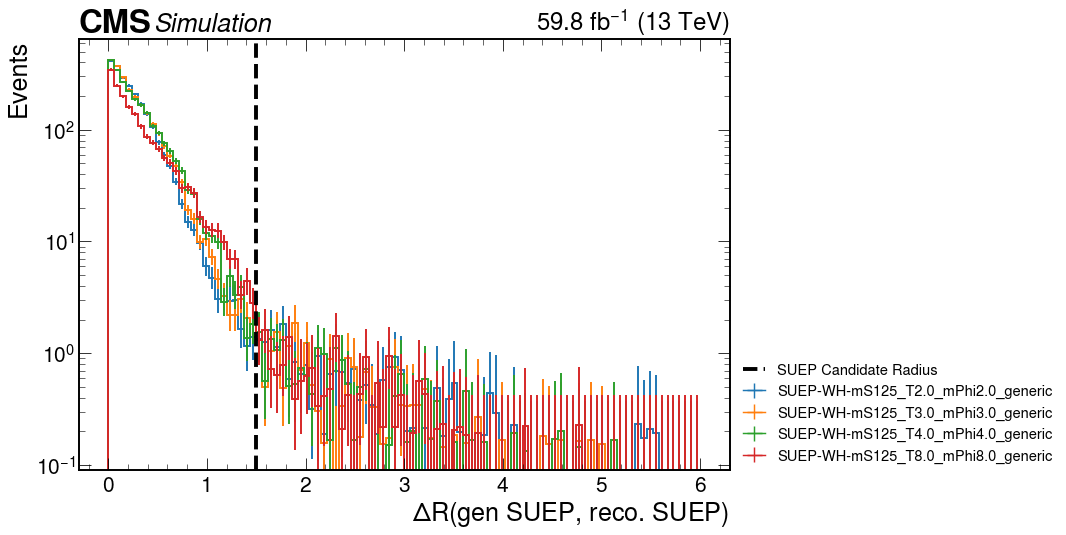

In [16]:
year = '2018'
plot_label = "deltaR_genSUEP_SUEP_SR"
samples = [
    "SUEP-WH-mS125_T2.0_mPhi2.0_generic",
    "SUEP-WH-mS125_T3.0_mPhi3.0_generic",
    "SUEP-WH-mS125_T4.0_mPhi4.0_generic",
    "SUEP-WH-mS125_T8.0_mPhi8.0_generic",
]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

for sample in samples:
    hep.histplot(plots[sample][plot_label], label=sample, histtype='step', linewidth=2, ax=ax)

hep.cms.label(llabel='Simulation',data=False, lumi=lumiLabel(year), ax=ax)
ax.axvline(1.5, color='black', linestyle='--', label='SUEP Candidate Radius', linewidth=4)
ax.legend(fontsize='xx-small', loc=(1.01,0))
ax.set_ylabel("Events")
ax.set_yscale('log')
if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}"), bbox_inches='tight')
fig.show()

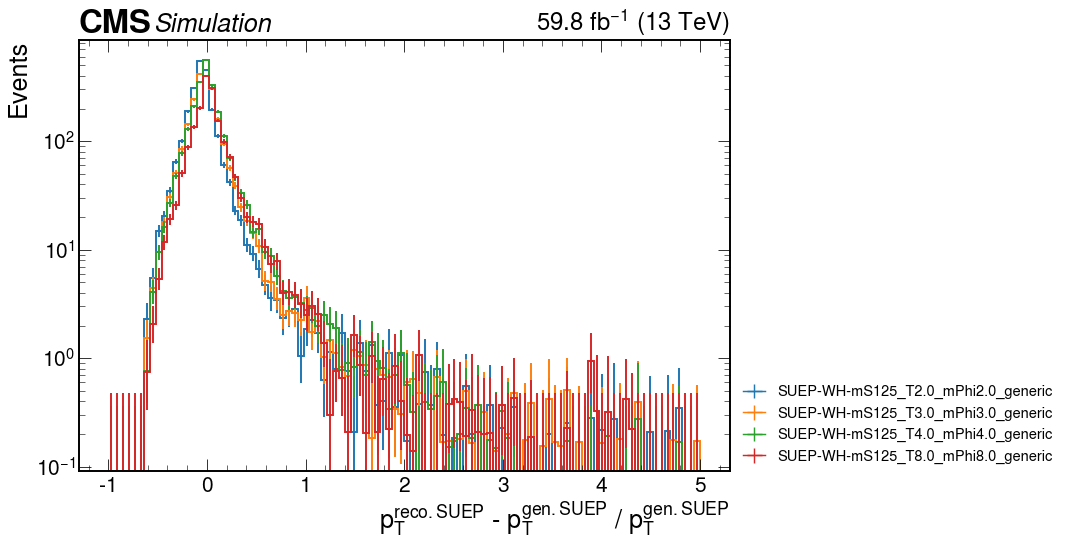

In [17]:
year = '2018'
plot_label = "SUEP_genSUEP_BV_SR"
samples = [
    "SUEP-WH-mS125_T2.0_mPhi2.0_generic",
    "SUEP-WH-mS125_T3.0_mPhi3.0_generic",
    "SUEP-WH-mS125_T4.0_mPhi4.0_generic",
    "SUEP-WH-mS125_T8.0_mPhi8.0_generic",
]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

hep.cms.label(llabel='Simulation',data=False, lumi=lumiLabel(year), ax=ax)

for sample in samples:
    hep.histplot(plots[sample][plot_label], label=sample, histtype='step', linewidth=2, ax=ax)

ax.legend(fontsize='xx-small', loc=(1.01,0))
ax.set_ylabel("Events")
ax.set_yscale('log')
if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}"), bbox_inches='tight')
fig.show()

# 6. Event Selection

## 6.1 W+jets

Tables of yields and efficiencies

In [10]:
samples= [
    'data_2018',
    'MC_2018',
    'WJetsToLNu_2018',
    'tt_2018',
    'DYJetsToLL_2018',
    'QCD_Pt_2018', 
    "SUEP-WH-mS125_T2.0_mPhi2.0_generic",
    "SUEP-WH-mS125_T3.0_mPhi3.0_generic",
    "SUEP-WH-mS125_T4.0_mPhi4.0_generic",
    "SUEP-WH-mS125_T8.0_mPhi8.0_generic",
] 
selections = [
    'total', 'goldenJSON', 
    'allTriggers',  'qualityFilters', 'orthogonality', 'oneTightLepton', 'MET20',
    'oneCluster', 'twoTracksInCluster',
    'SUEP_nconst_HighestPT_>=_10.0_SR',
    'WH_MET_pt_>_30.0_SR',
    'W_pt_>_60.0_SR',
    "W_mt_>_30.0_SR",
    'bjetSel_==_1.0_SR',
    'deltaPhi_SUEP_W_>_1.5_SR', 'deltaPhi_SUEP_MET_>_1.5_SR', 'deltaPhi_lepton_SUEP_>_1.5_SR',
    'cutflow_ak4jets_inSUEPcluster_n_HighestPT_>=_1.0_SR',
    'W_SUEP_BV_<_2.0_SR',
    'deltaPhi_minDeltaPhiMETJet_MET_>_1.5_SR',
    'SUEP_S1_HighestPT_>_0.3_SR'
]
selection_labels = [
    'Total','Golden JSON',
    'Triggers', 'Quality filters', 'ZH, ggF orthogonality', 'One tight lepton', '$p^{MET}_T > 20 \GeV$',
    'One ak15 cluster', 'Two tracks in ak15 cluster',
    '\\nSUEPconstituents $>$ 10 (and blind)',
    '$p^{MET}_T > 30 \GeV$',
    '$p^{W}_T > 40 \GeV$',
    "$30 \GeV < m^{W}_T < 130 \GeV$",
    '0 ($<$ 2) tight (loose) b-tagged jets',
    '$\Delta\phi$(SUEP, W) $>$ 1.5', '$\Delta\phi$(SUEP, MET) $>$ 1.5', '$\Delta\phi$(lepton, SUEP) $>$ 1.5',
    '$> 0$ ak4 jets inside SUEP candidate',
    'BV(W, SUEP) $< 2.0$',
    'min($\Delta\phi$(jet, MET)) $>$ 1.5',
    '\\boostedSphercity $>$ 0.3'
]

# SUEPER TEMPOROARY
for sample in samples:
    for key in list(plots[sample].keys()):
        if 'cutflow' in key and 'nominal' in key:
            plots[sample][key.replace("_nominal", "")] = plots[sample][key]

table = cutflow_table(plots, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table.get_latex_string())
print()
table = cutflow_table(plots, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=3)
print("Relative efficiencies")
print(table.get_latex_string())

Yields
\begin{tabular}{ccccccccccc}
Selection & data_2018 & MC_2018 & WJetsToLNu_2018 & tt_2018 & DYJetsToLL_2018 & QCD_Pt_2018 & SUEP-WH-mS125_T2.0_mPhi2.0_generic & SUEP-WH-mS125_T3.0_mPhi3.0_generic & SUEP-WH-mS125_T4.0_mPhi4.0_generic & SUEP-WH-mS125_T8.0_mPhi8.0_generic \\
Total & 2.3613e+09 & 8.1898e+13 & 3.7197e+09 & 2.7135e+07 & 1.1867e+08 & 8.1894e+13 & 25807 & 25807 & 25807 & 25807 \\
Golden JSON & 2.2594e+09 & 8.1898e+13 & 3.7197e+09 & 2.7135e+07 & 1.1867e+08 & 8.1894e+13 & 25807 & 25807 & 25807 & 25807 \\
Triggers & 1.3987e+09 & 1.6425e+09 & 7.619e+08 & 1.133e+07 & 5.007e+07 & 8.1154e+08 & 9063.3 & 9037.2 & 9083.6 & 9091.9 \\
Quality filters & 1.3973e+09 & 1.642e+09 & 7.618e+08 & 1.1324e+07 & 5.0057e+07 & 8.1121e+08 & 9061 & 9035.6 & 9082.2 & 9087.8 \\
ZH, ggF orthogonality & 8.1652e+08 & 9.3375e+08 & 7.0051e+08 & 9.7911e+06 & 2.0396e+07 & 1.9703e+08 & 8435.8 & 8389.7 & 8420.7 & 8422.5 \\
One tight lepton & 6.0679e+08 & 6.4655e+08 & 5.6828e+08 & 8.1944e+06 & 1.6977e+07 & 4.

SR histograms, blinded for now

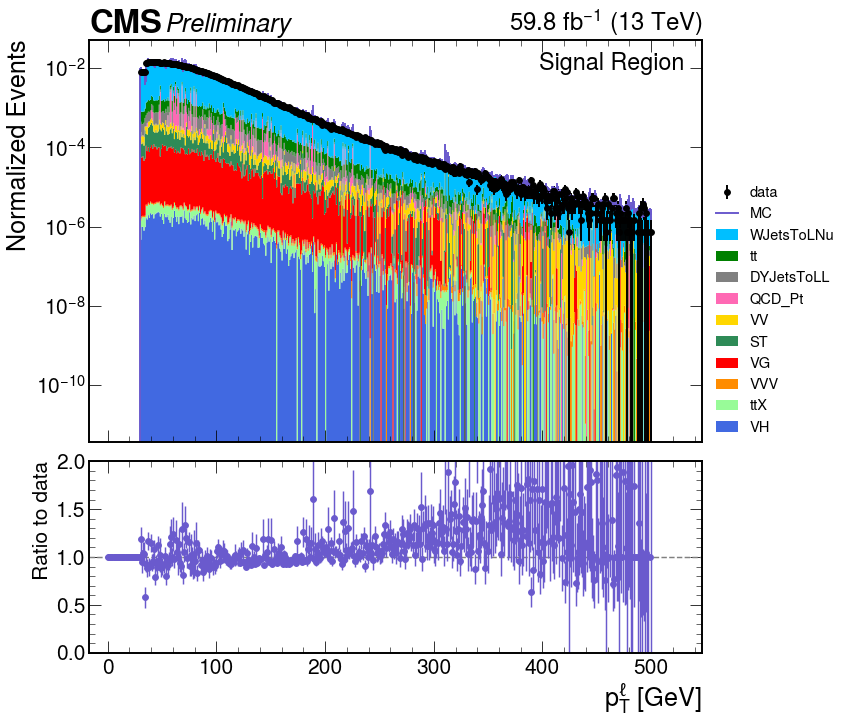

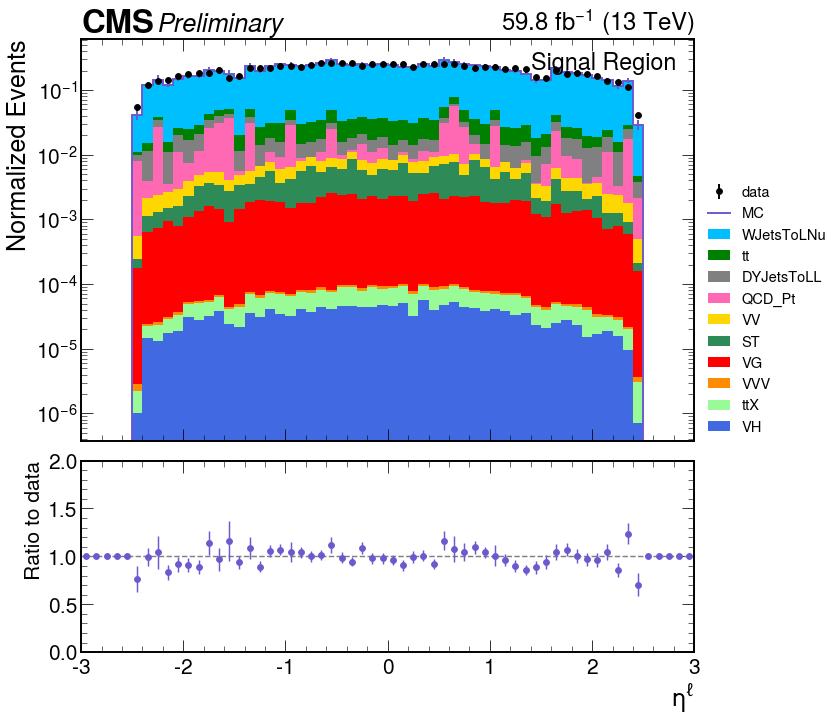

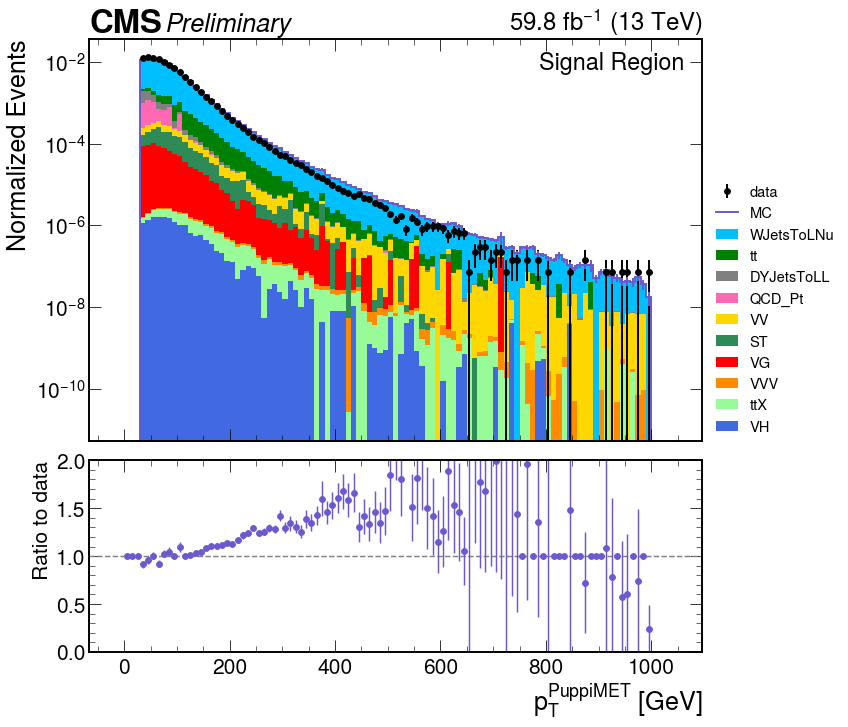

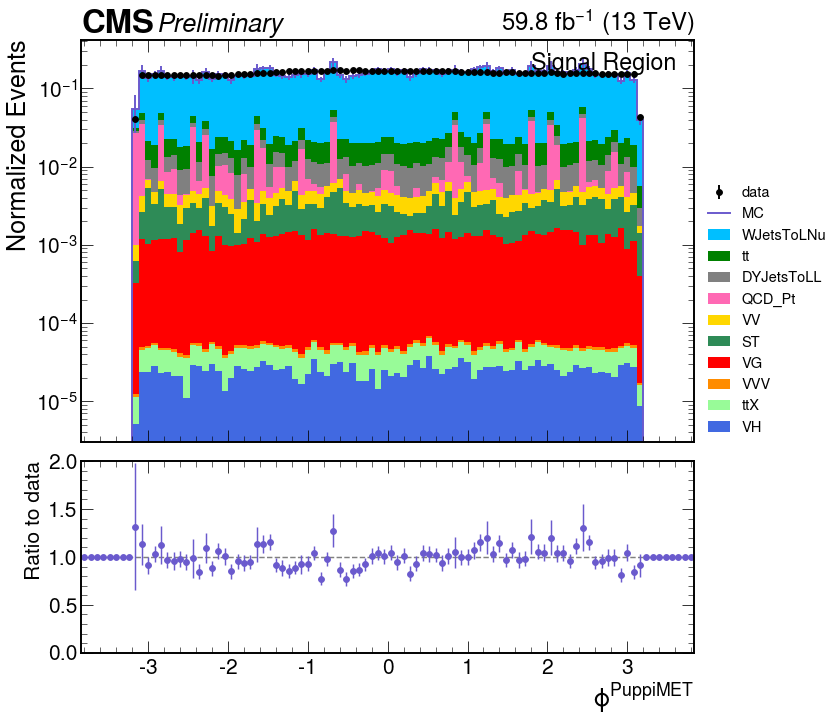

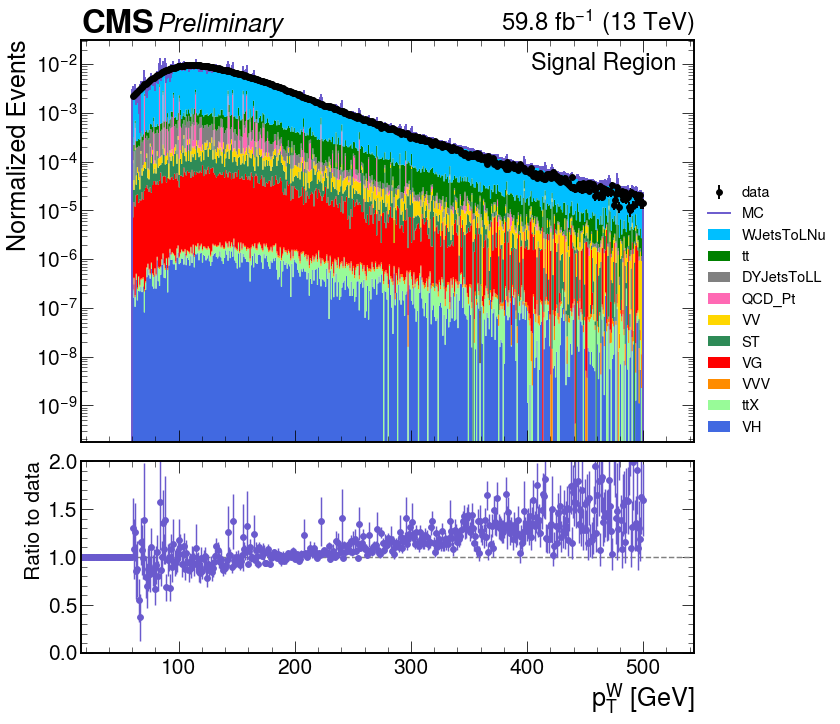

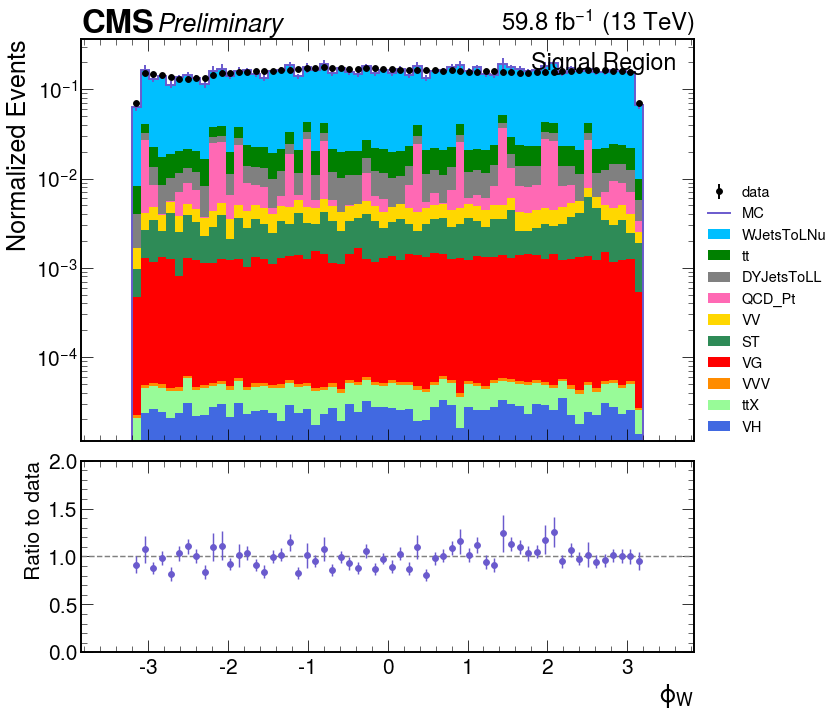

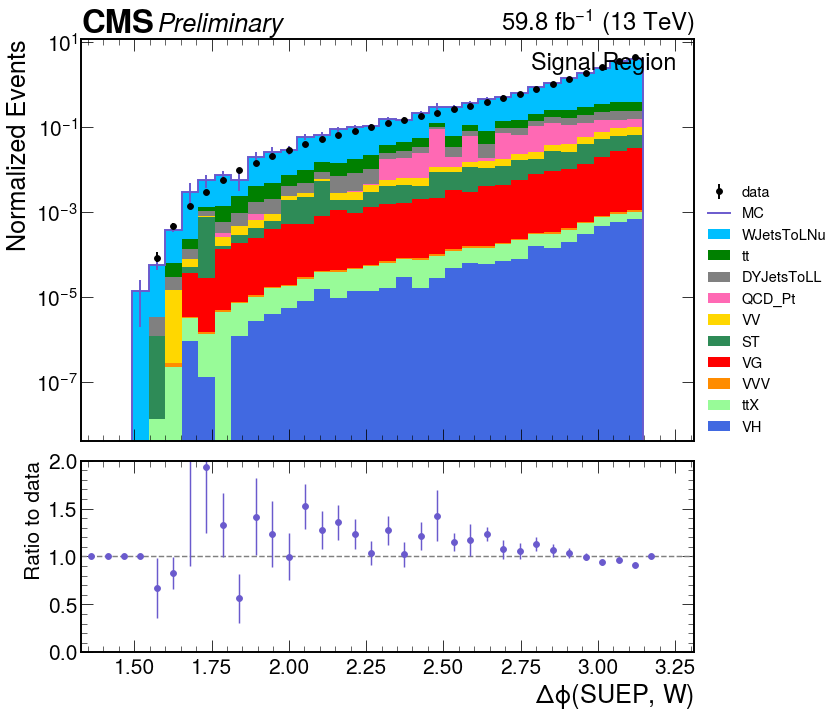

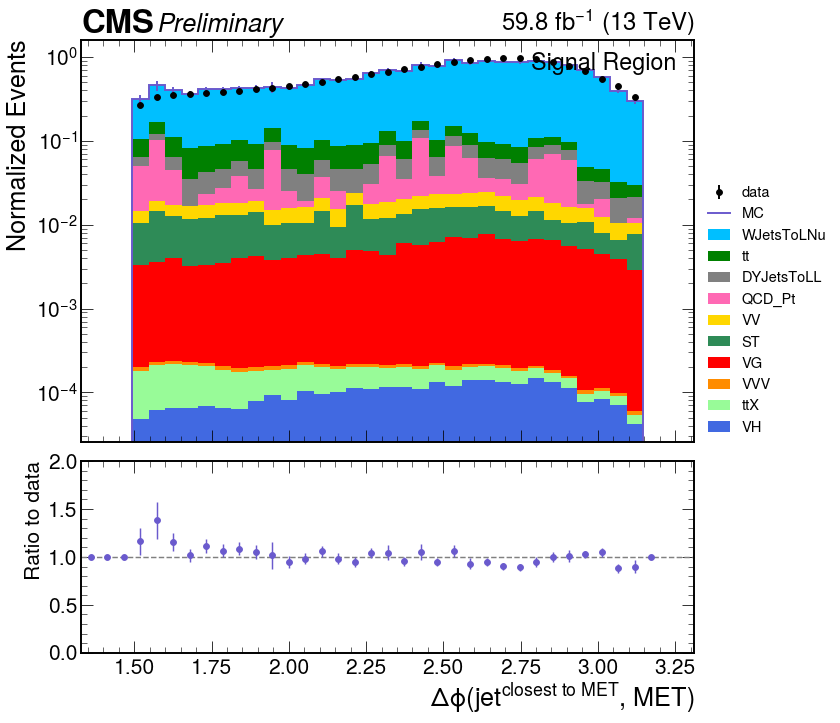

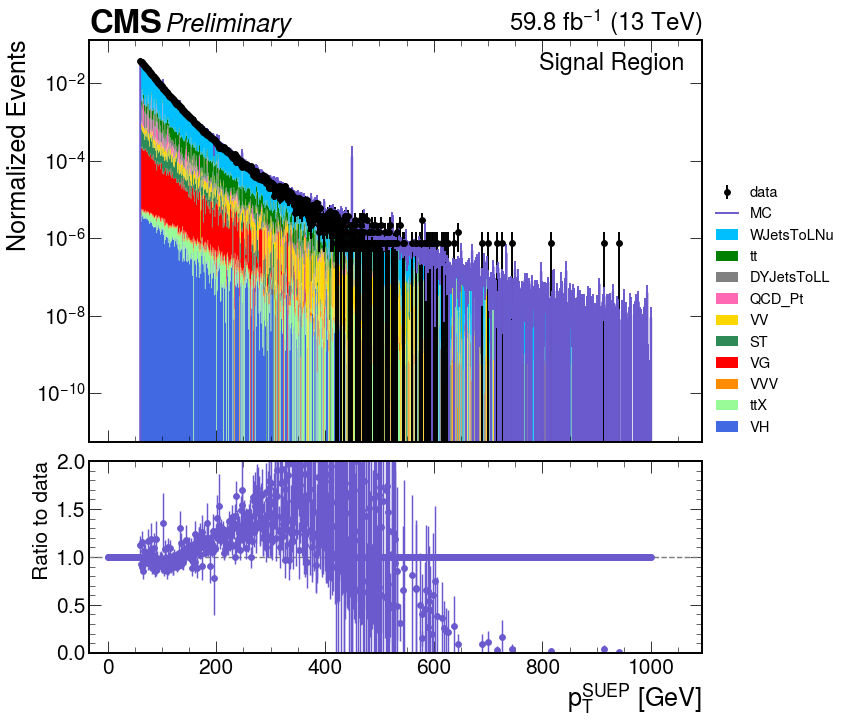

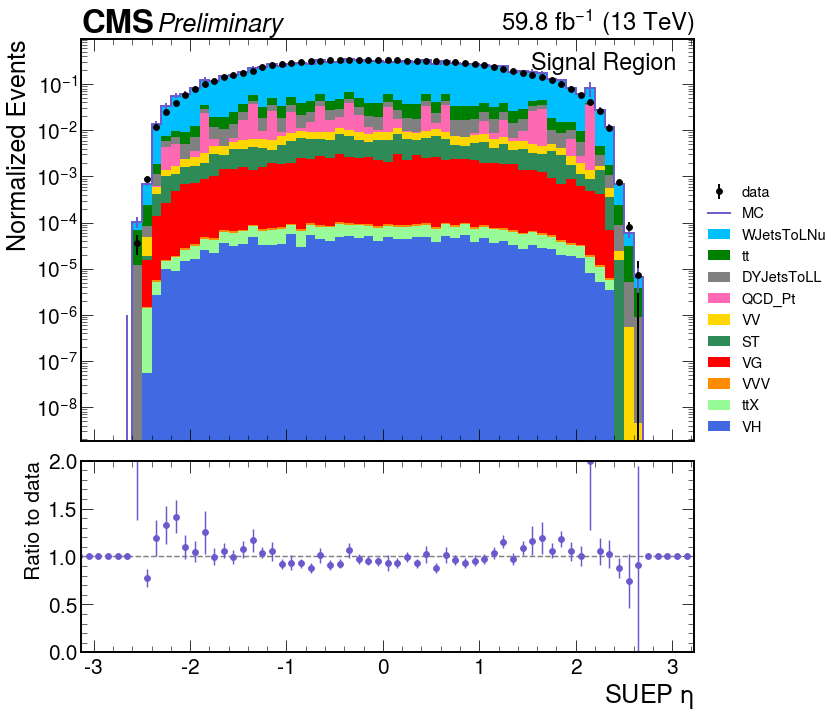

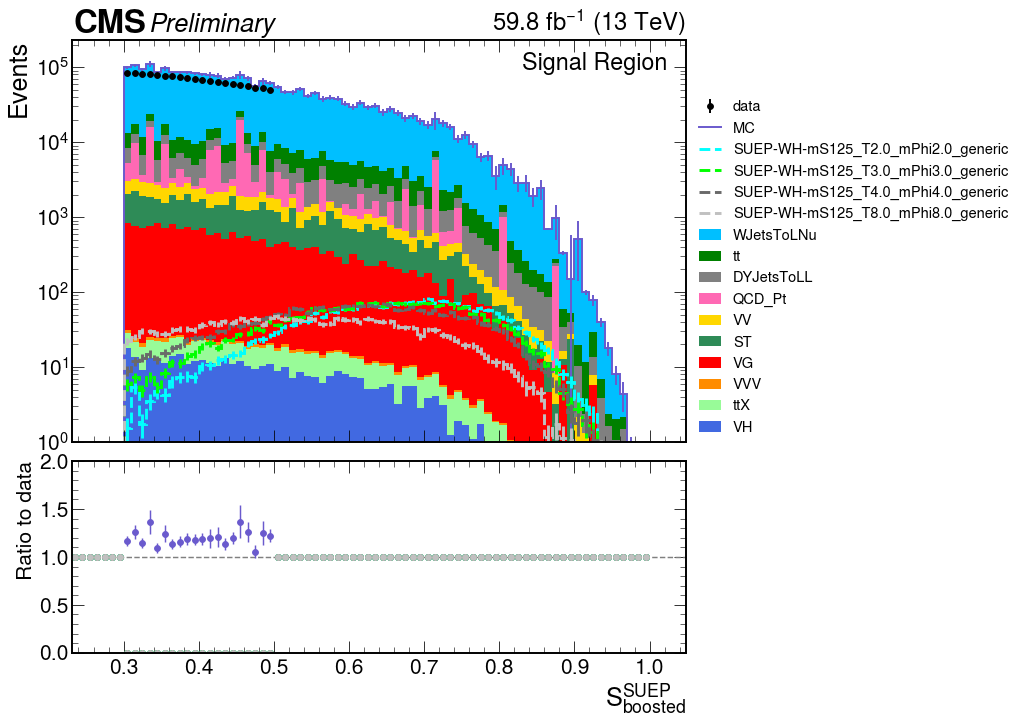

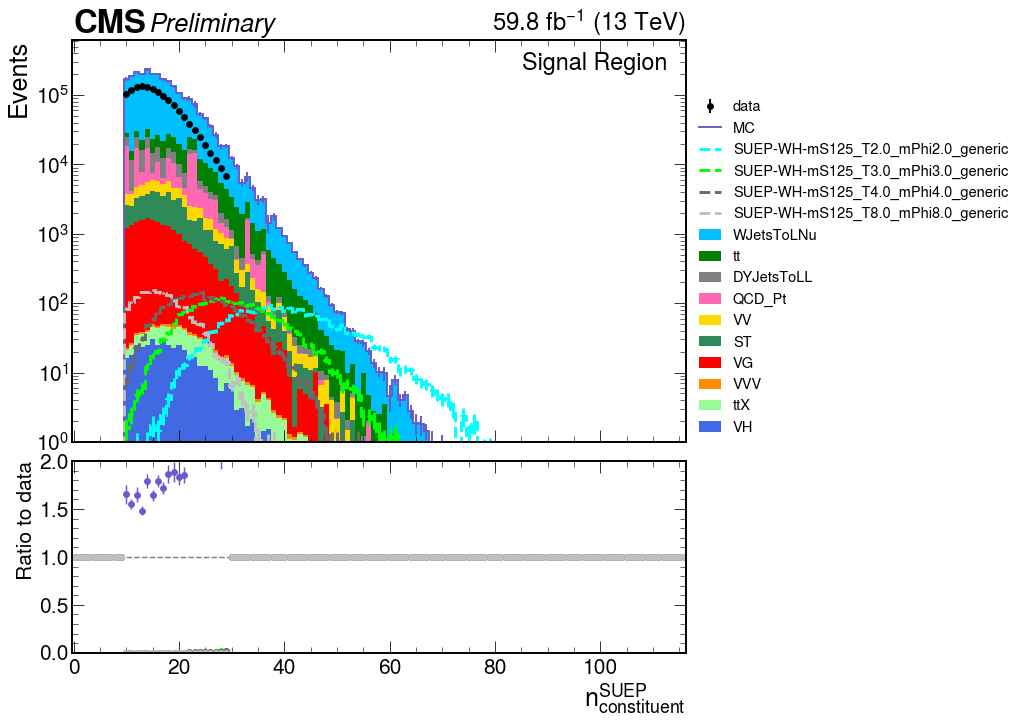

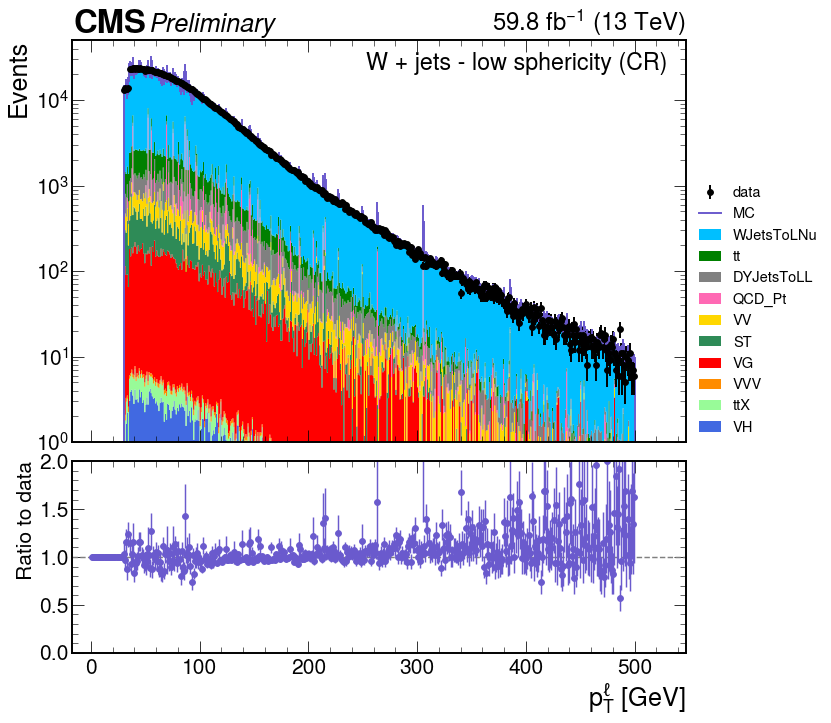

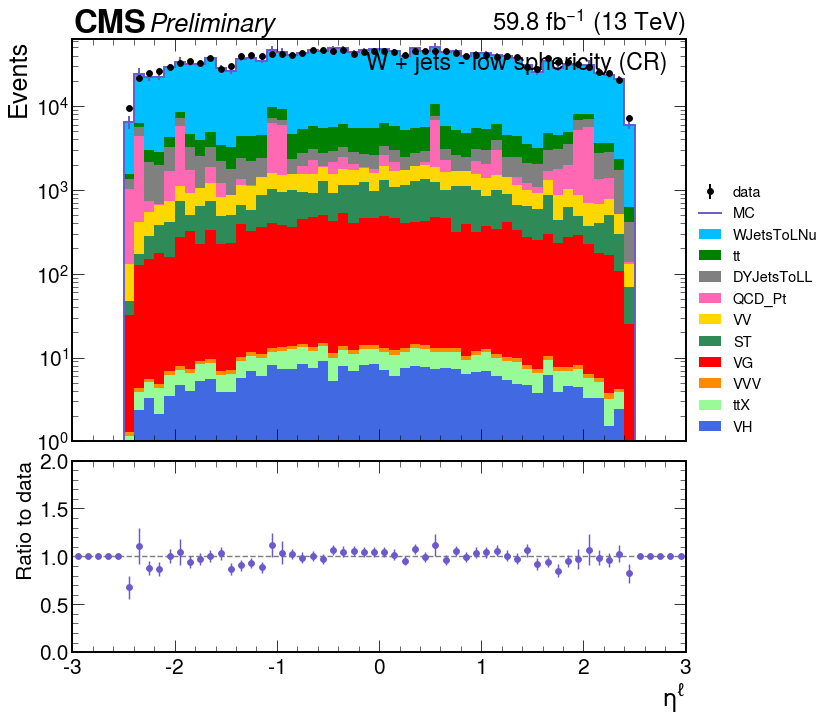

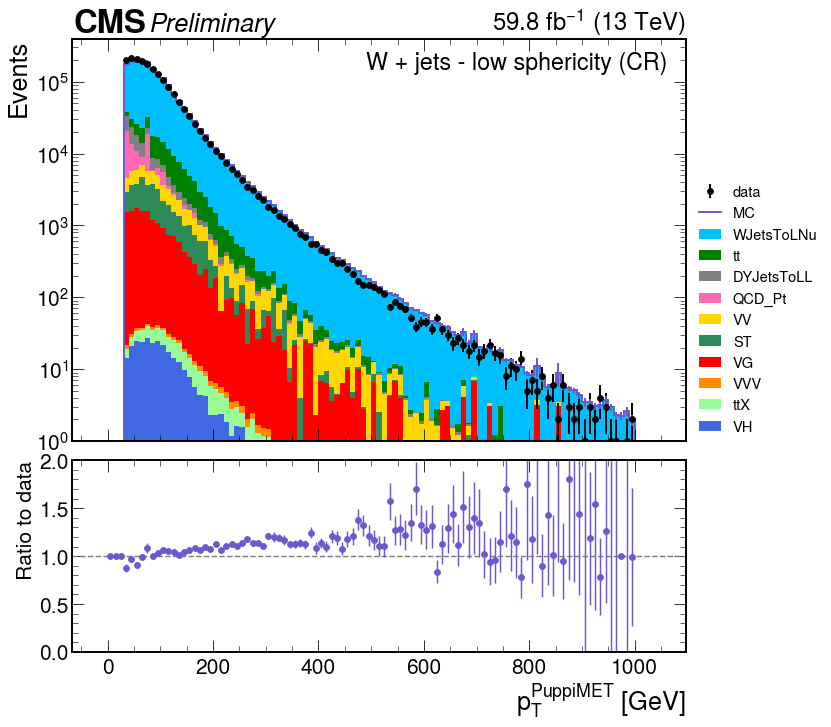

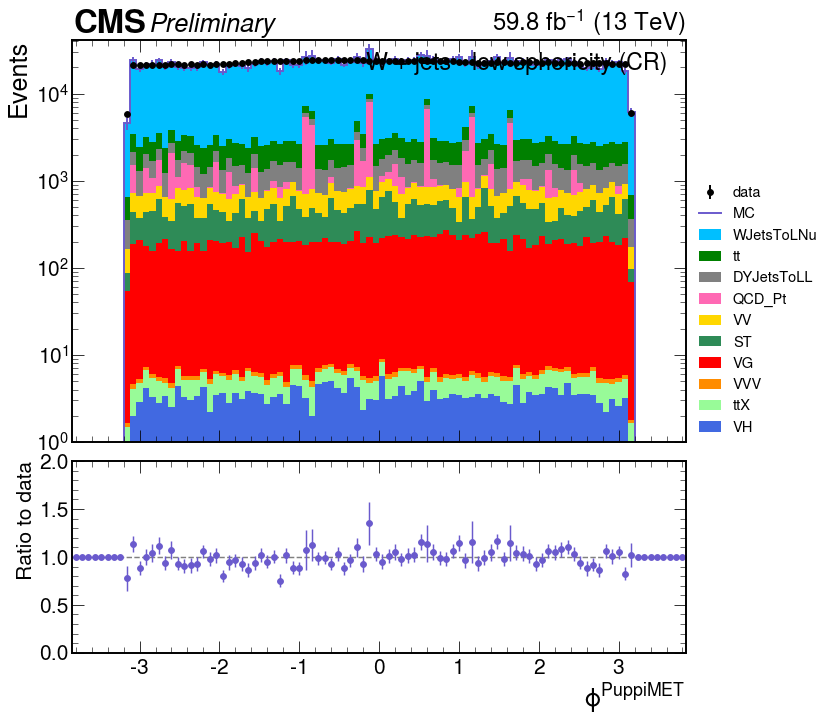

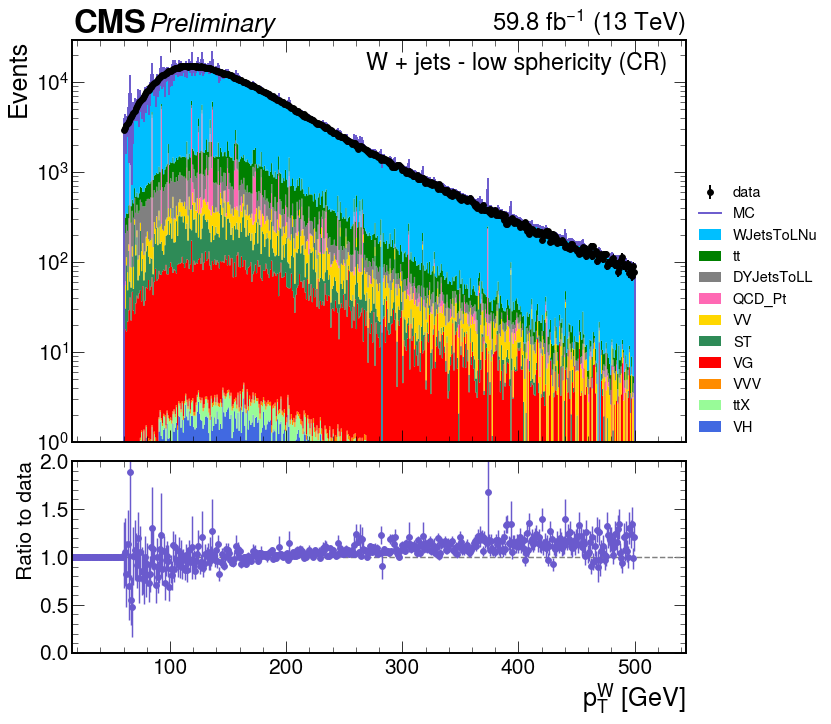

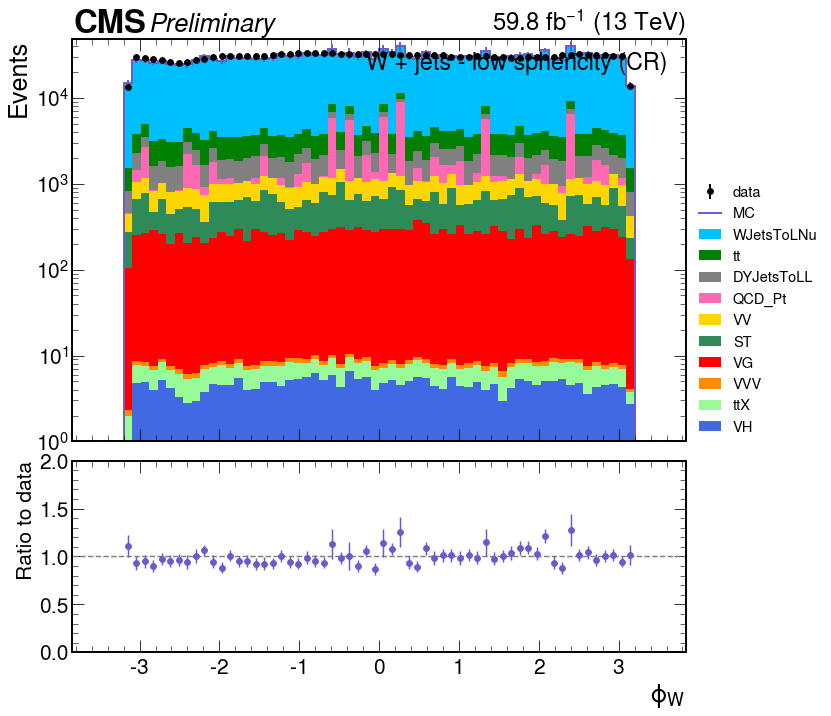

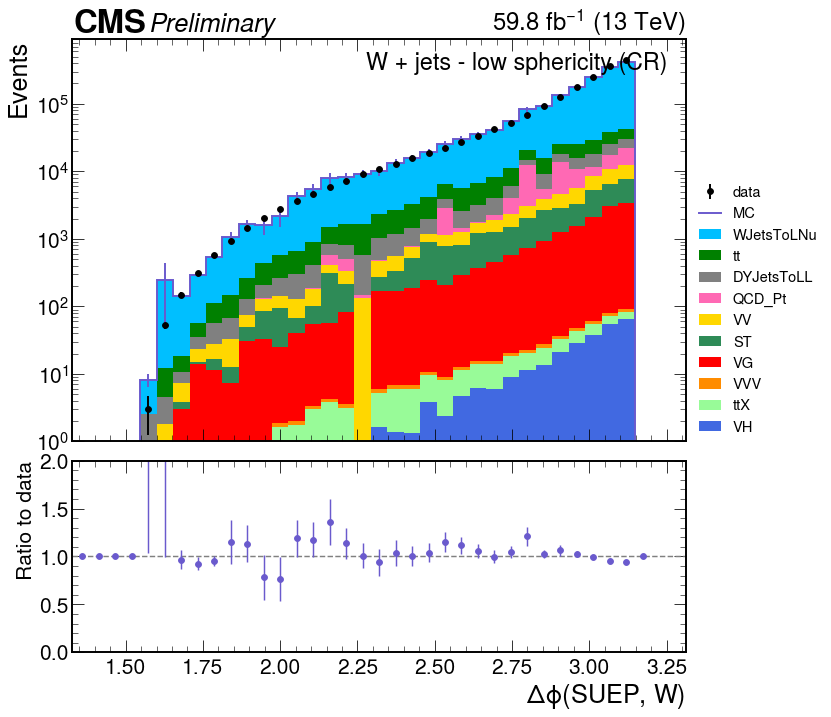

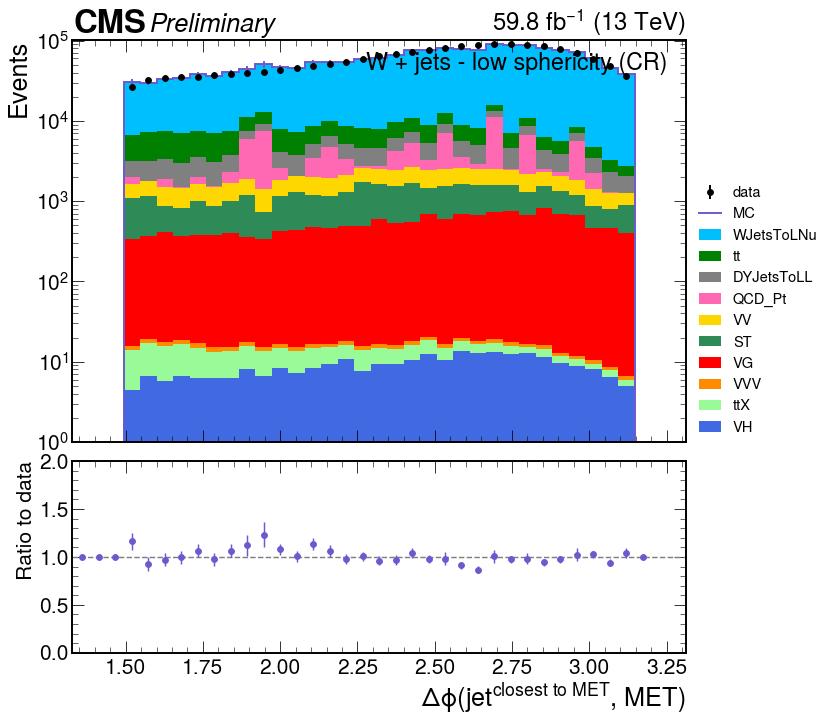

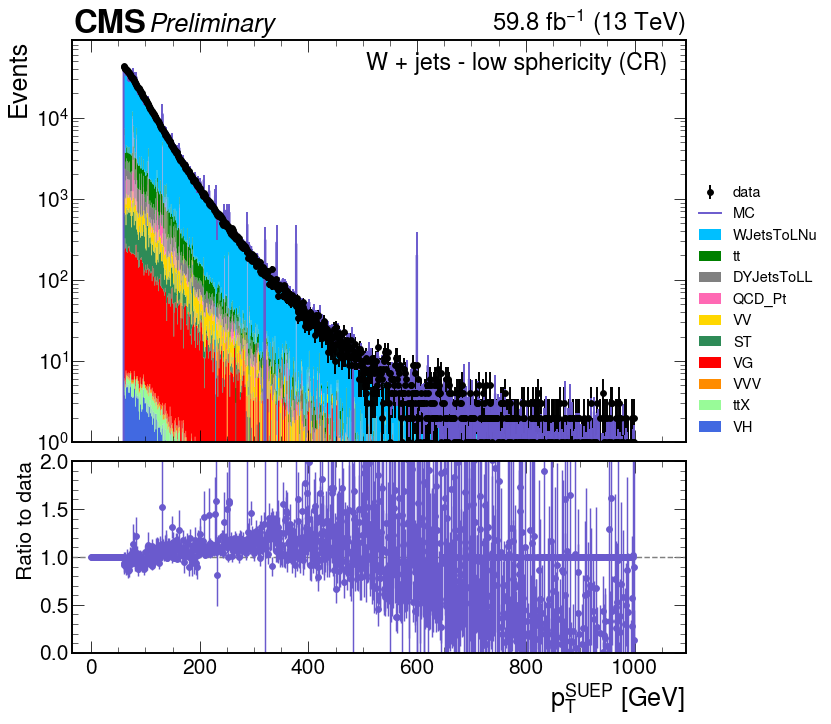

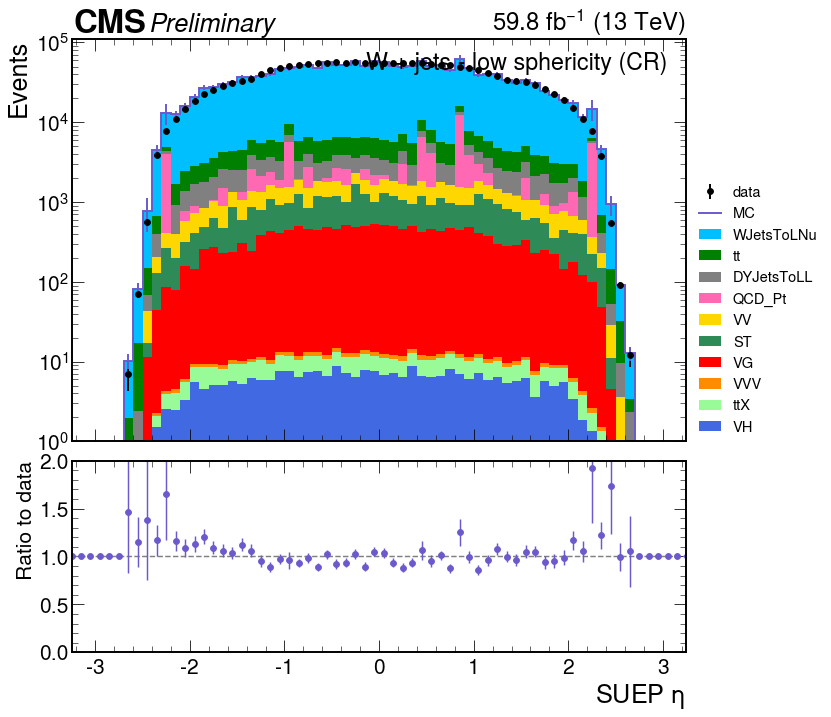

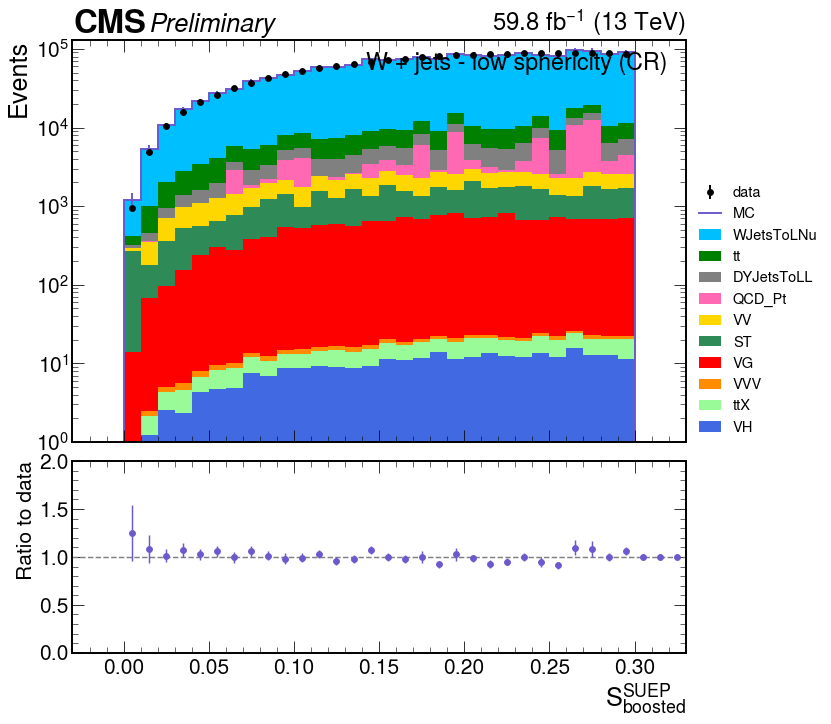

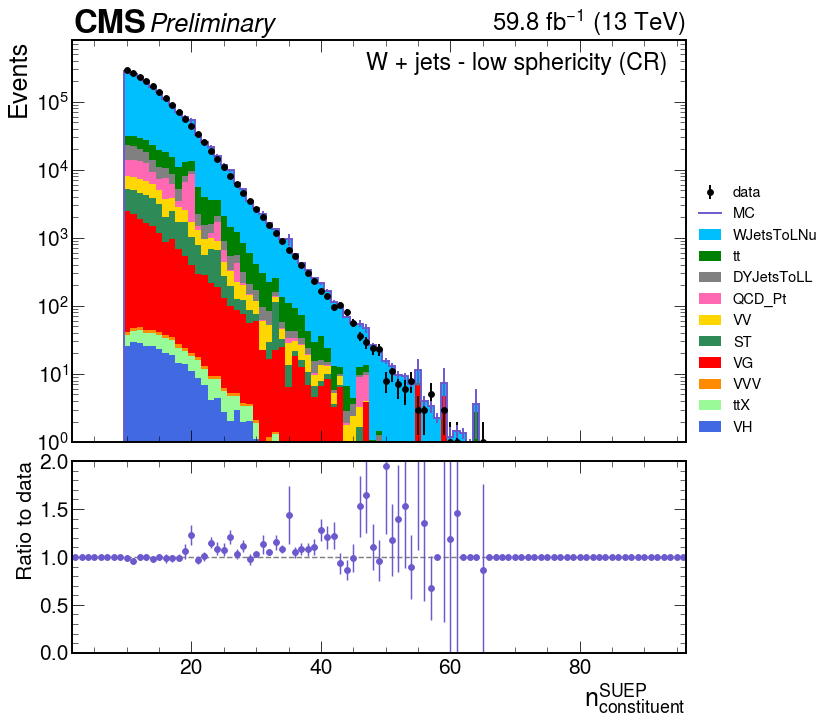

In [18]:
years = ['2018']
for year in years:

    year = '2018'
    plot_tags = [
        "SR", 
        "CRWJ"
    ]
    plot_labels =  [
        'lepton_pt',
        'lepton_eta',
        'PuppiMET_pt',
        'PuppiMET_phi',
        'W_pt',
        'W_phi',
        'deltaPhi_SUEP_W',
        'deltaPhi_minDeltaPhiMETJet_MET',
        'SUEP_pt',
        'SUEP_eta',
        'SUEP_S1',
        'SUEP_nconst',
    ]
    samples = ['data', 'MC']
    stacked_samples = bkgs

    for tag in plot_tags:
            
            for plot_label in plot_labels:

                density = False
                if tag == 'SR' and not (plot_label in ['SUEP_S1', 'SUEP_nconst']): density = True
                
                _samples = samples.copy()
                if tag == 'SR':
                    if plot_label == 'SUEP_S1' or plot_label == 'SUEP_nconst':
                        _samples.append('SUEP-WH-mS125_T2.0_mPhi2.0_generic')
                        _samples.append('SUEP-WH-mS125_T3.0_mPhi3.0_generic')
                        _samples.append('SUEP-WH-mS125_T4.0_mPhi4.0_generic')
                        _samples.append('SUEP-WH-mS125_T8.0_mPhi8.0_generic')

                norm = 1.0
                if tag == 'CRWJ':
                    norm = plots['data_'+year][plot_label+"_"+tag].sum().value / plots['MC_'+year][plot_label+"_"+tag].sum().value  


                hlist = []
                for sample in _samples:
                    _h = plots[sample+"_"+year][plot_label+"_"+tag]
                    if 'data' not in sample: _h *= norm
                    hlist.append(_h)

                stacked_hlist = []
                for sample in stacked_samples:
                    _h = plots[sample+"_"+year][plot_label+"_"+tag]
                    if 'data' not in sample: _h *= norm
                    stacked_hlist.append(_h)

                fig, axs = styled_plot_ratio(hlist, _samples, stacked_hlist=stacked_hlist, stacked_labels=stacked_samples, density=density)
                # fig.set_size_inches(15, 15)
                hep.cms.label(llabel='Preliminary', lumi=lumiLabel(year), ax=axs[0])
                axs[1].set_ylim(0.0, 2.0)

                axs[0].text(0.97, 0.97, region_labels.get(tag, None),
                transform=axs[0].transAxes, 
                fontsize=24, va='top', ha='right')
                save_to_AN = True
                if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}_{tag}_{year}"), bbox_inches='tight')
                fig.show()

Years in comparison

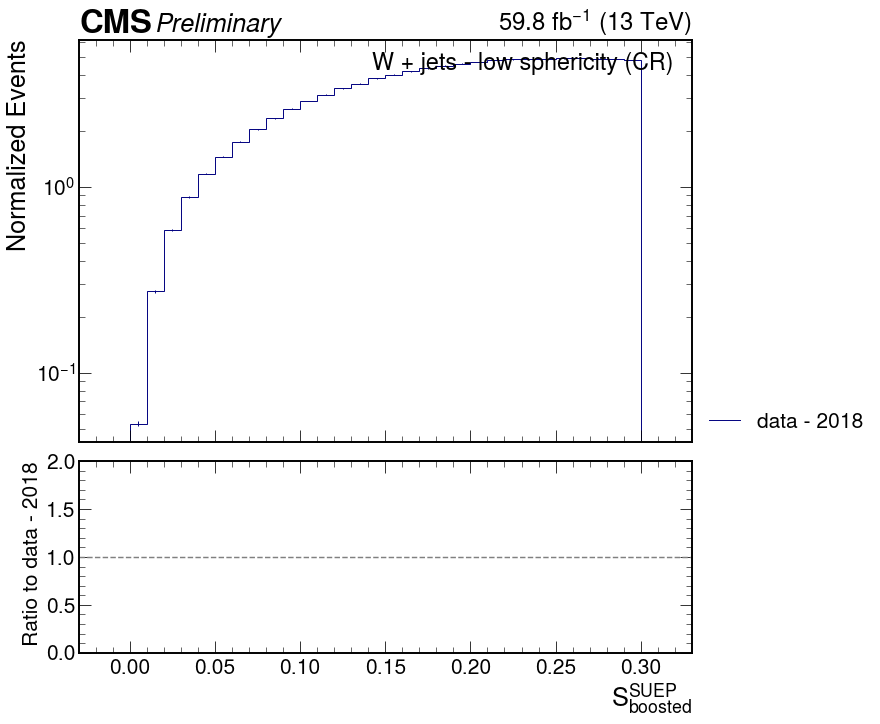

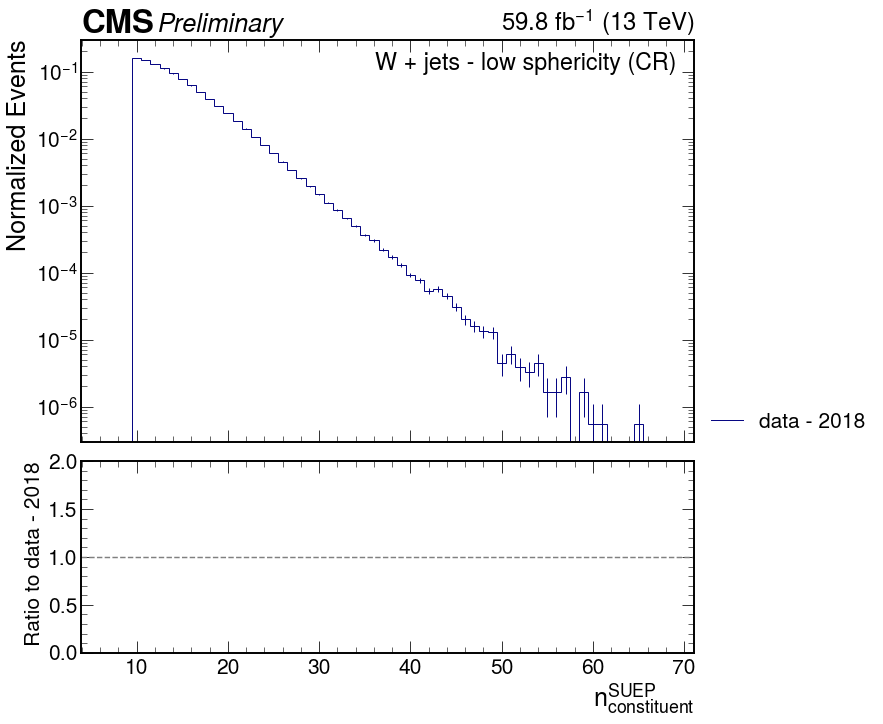

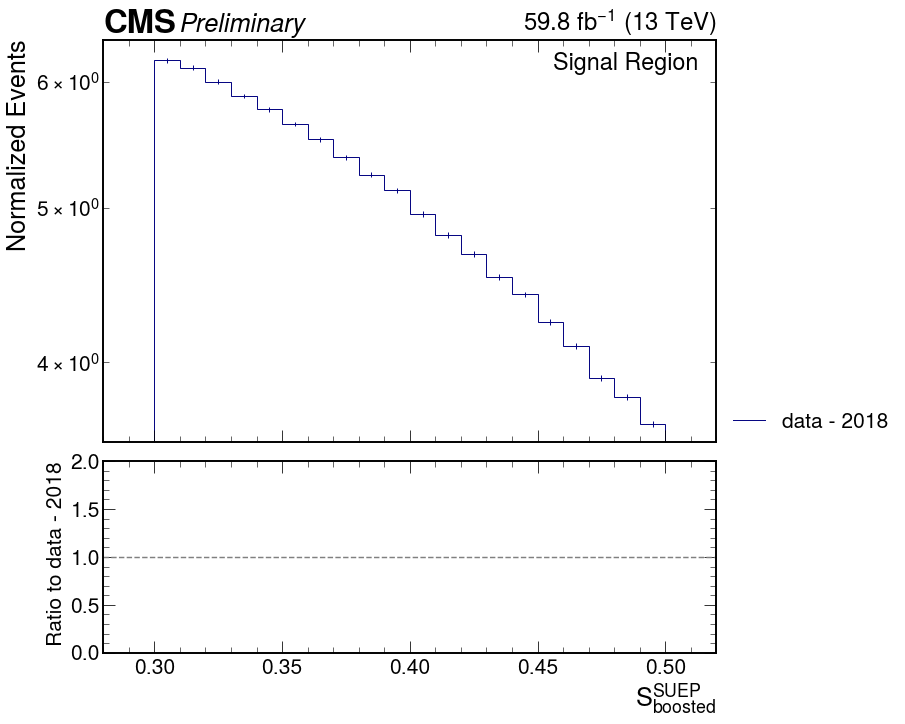

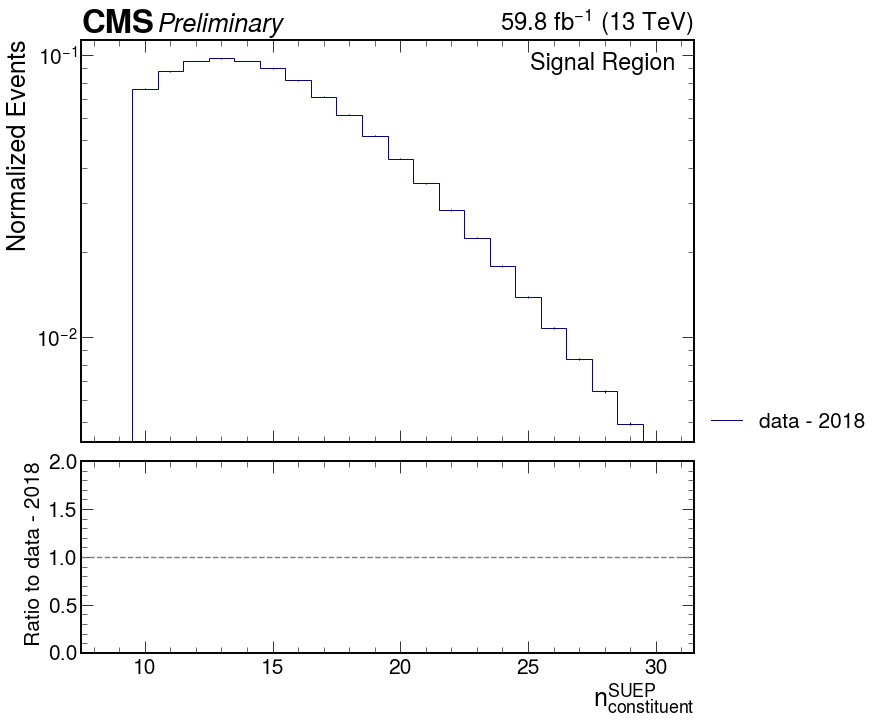

In [19]:
years = ['2018']
plot_labels = [
    'SUEP_S1',
    'SUEP_nconst'
]
plot_tags = ['CRWJ', 'SR']

for tag in plot_tags:

    for plot_label in plot_labels:

        hlist = [plots["data_"+year][plot_label+"_"+tag] for year in years]
        fig, axs = plot_ratio(hlist, ["data - "+year for year in years], density=True)
        hep.cms.label(llabel='Preliminary', lumi=lumiLabel(year), ax=axs[0])
        axs[1].set_ylim(0.0, 2.0)
        axs[0].legend(loc=(1.01,0))
        axs[0].text(0.97, 0.97, region_labels.get(tag, None), 
                    transform=axs[0].transAxes,
                    fontsize=24, va='top', ha='right')

        if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}_{tag}_allyears"), bbox_inches='tight')
        fig.show()

## 6.3 Gamma+Jets

Gamma + jets histograms with data and MC for each year.

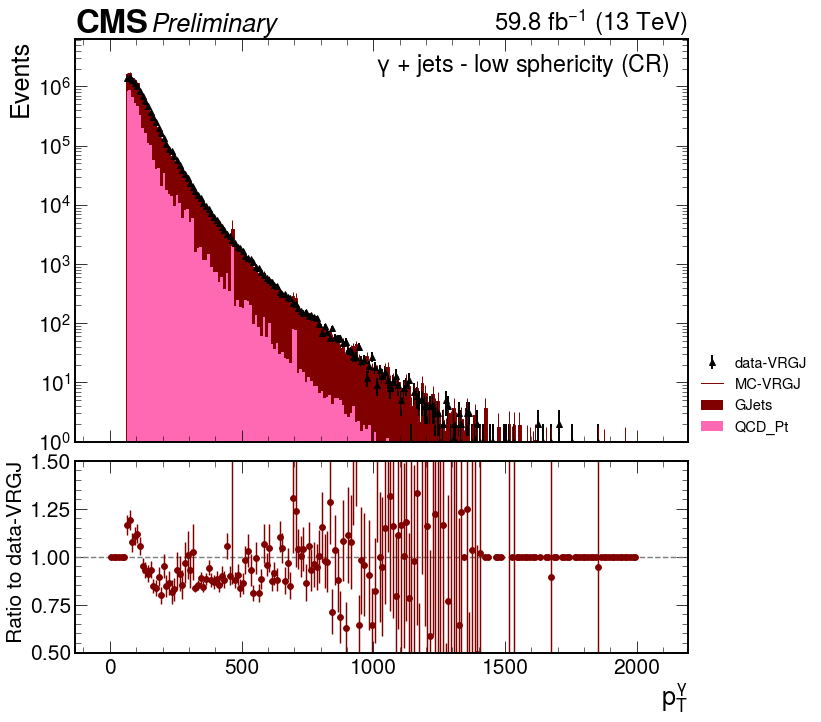

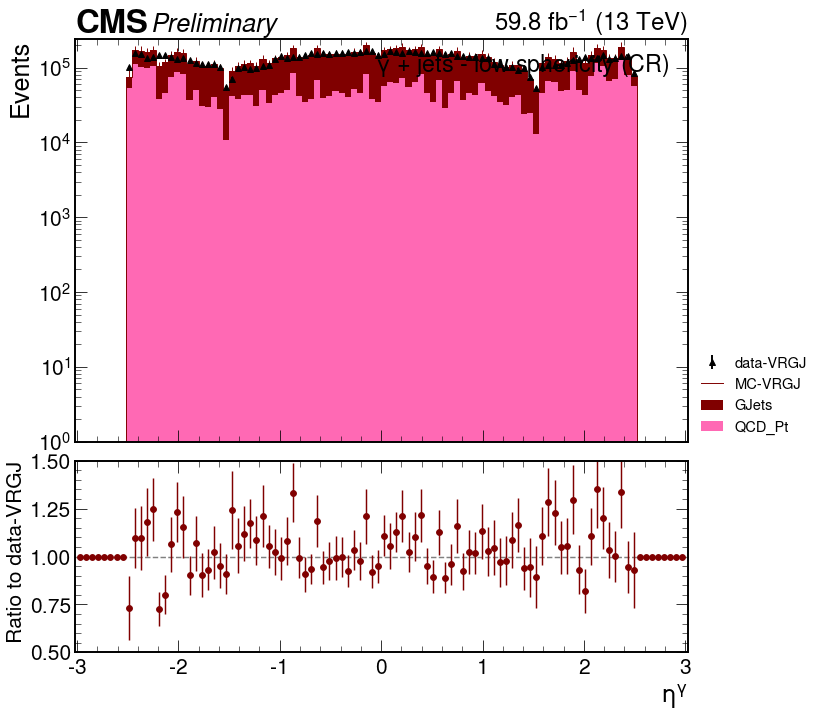

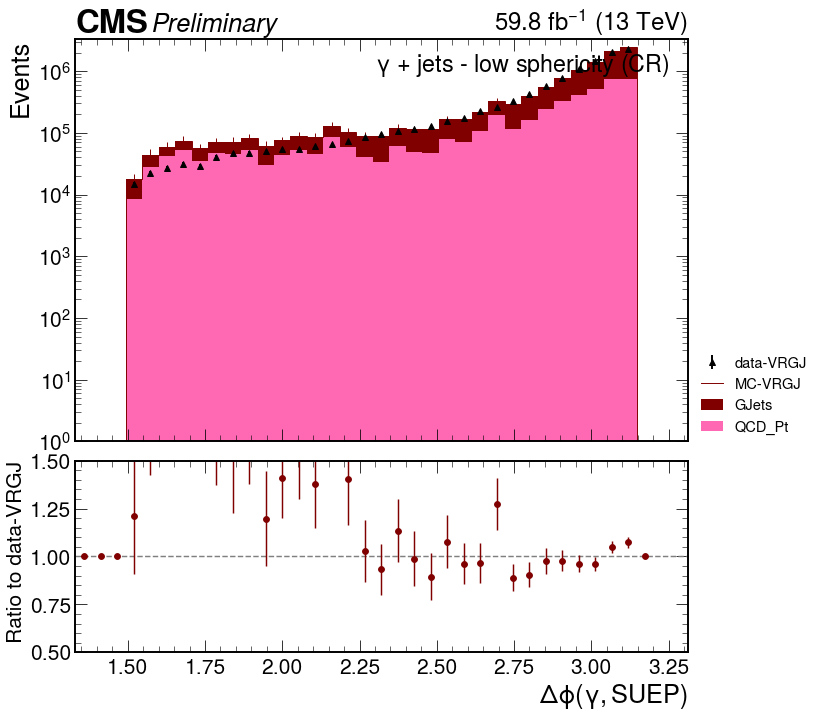

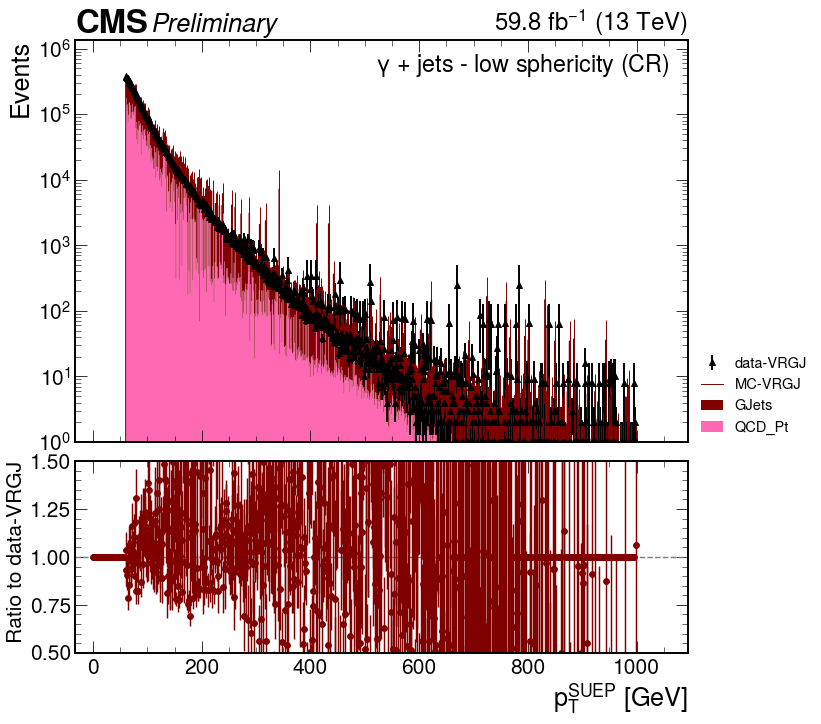

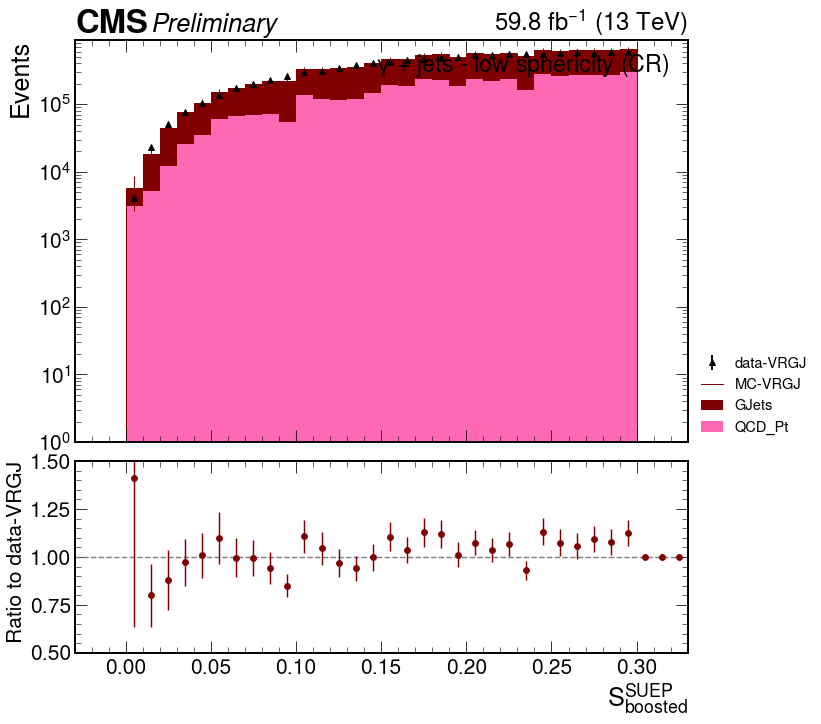

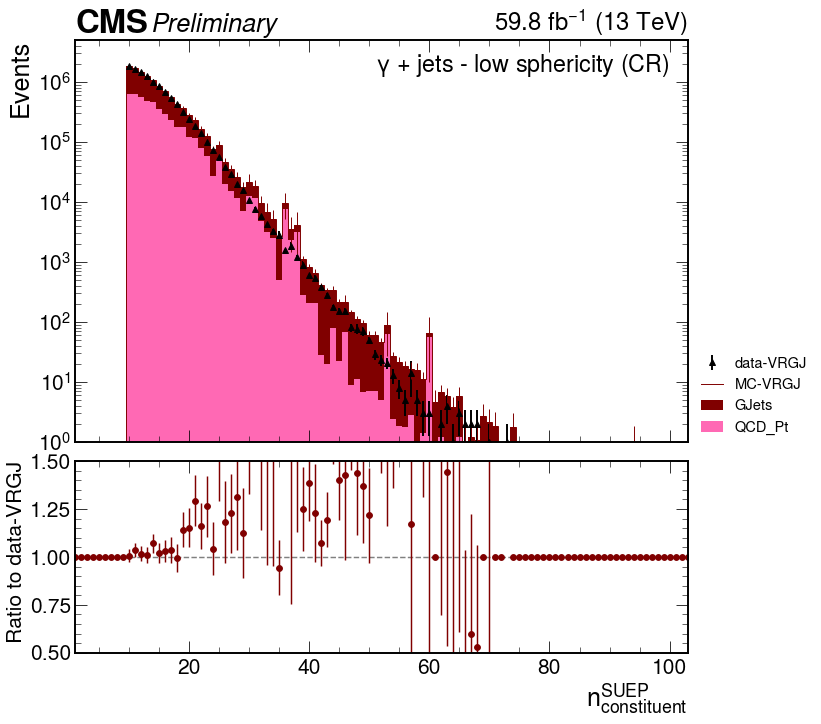

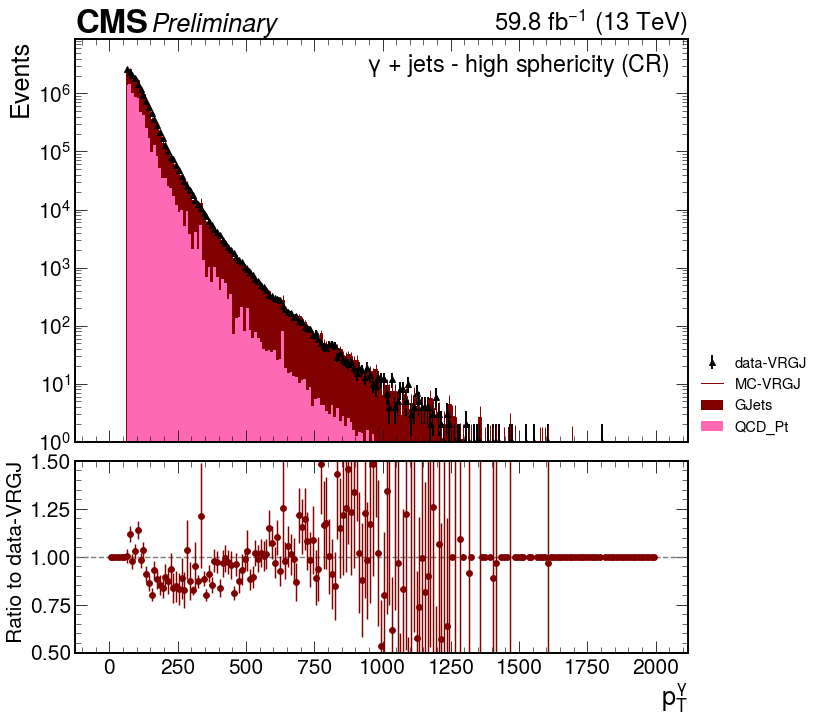

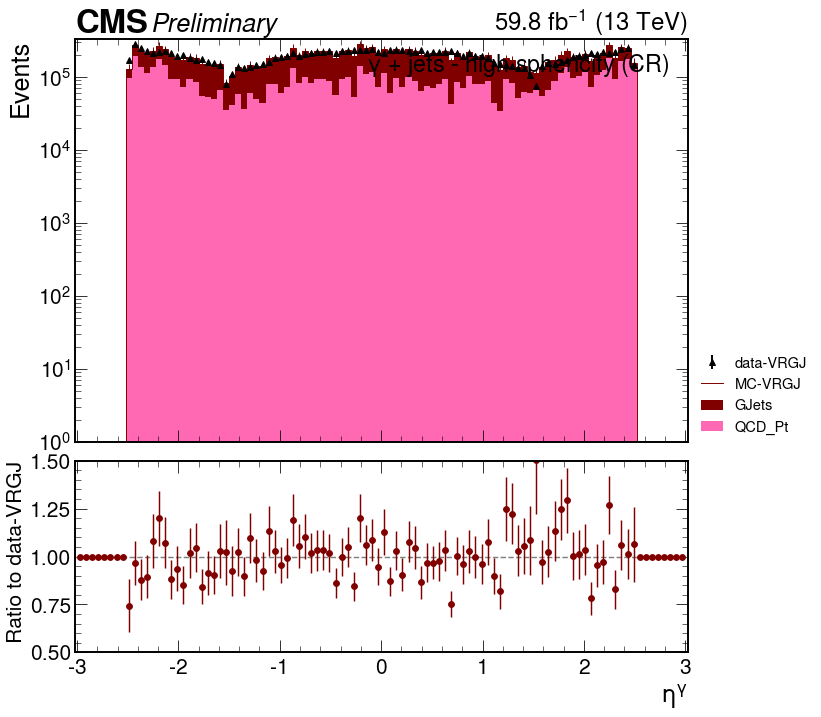

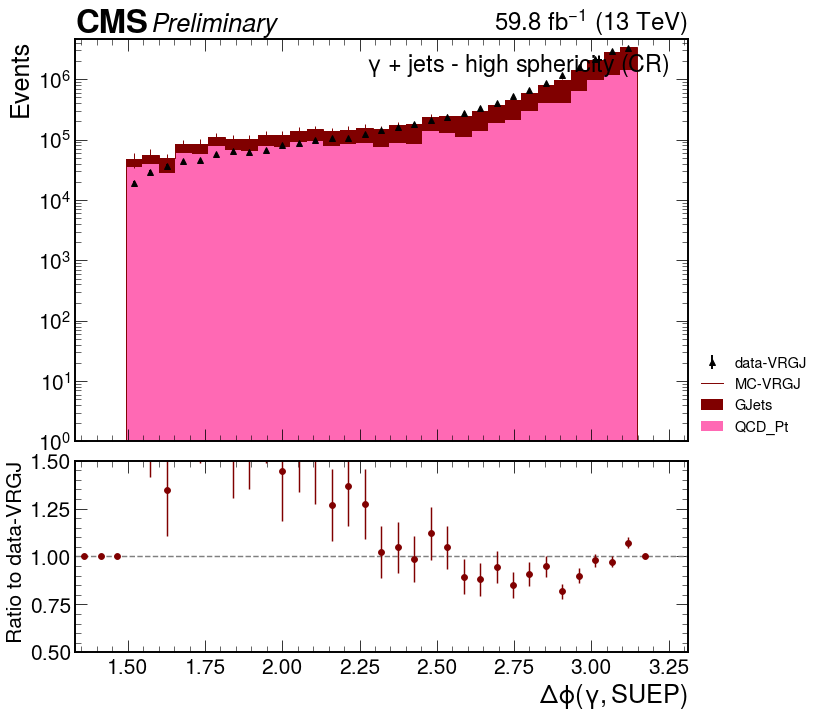

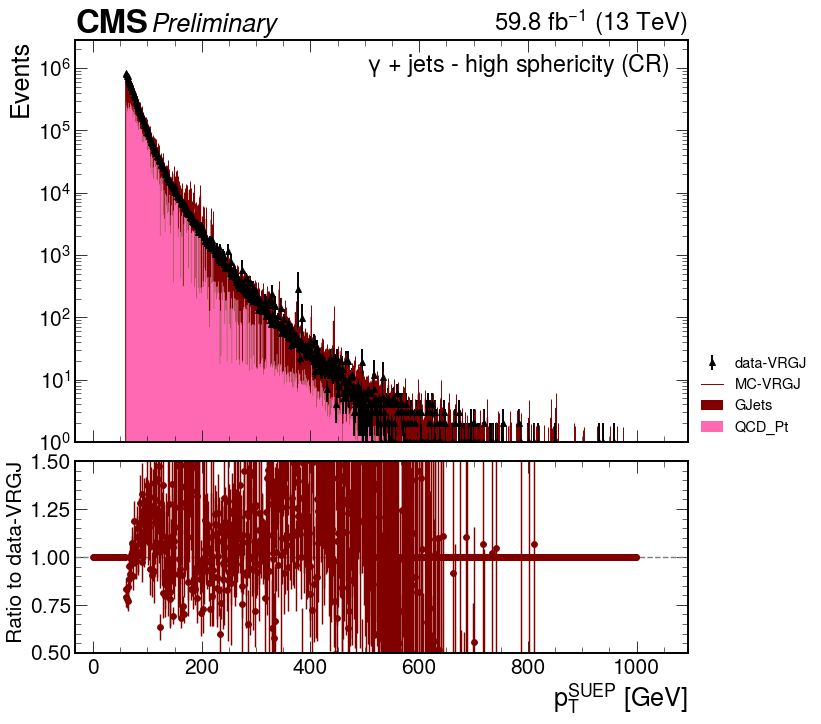

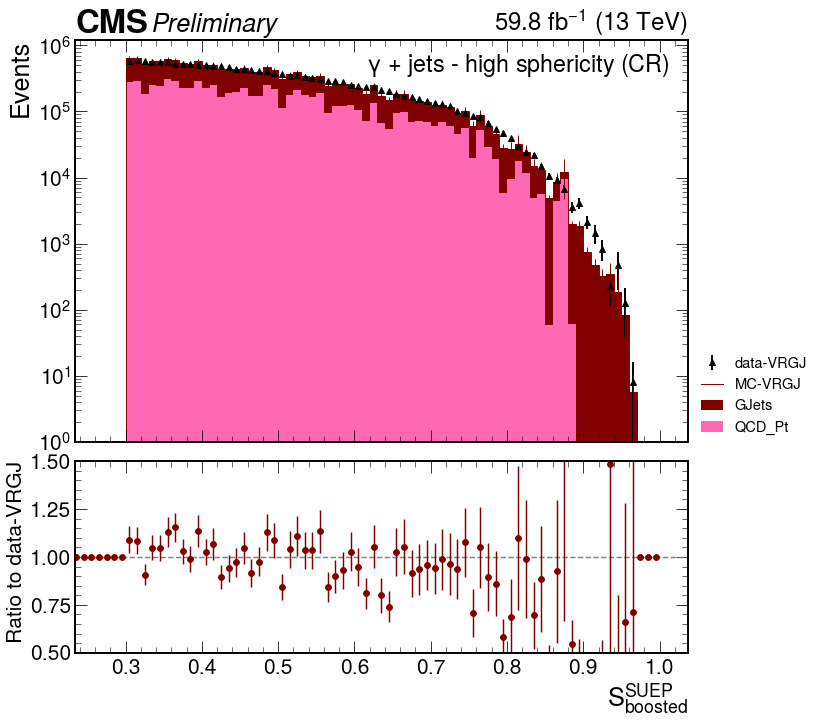

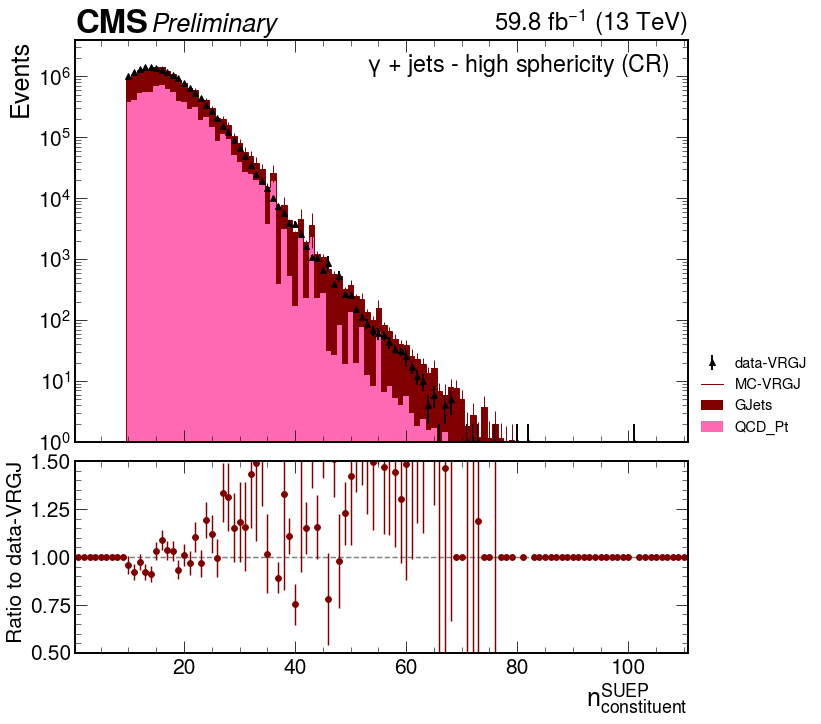

In [20]:
years = ['2018']
plot_tags = [
    "VRGJlowS",
    "VRGJhighS"
]
plot_labels =  [
    "photon_pt",
    "photon_eta",
    "deltaPhi_SUEP_photon",
    "SUEP_pt",
    "SUEP_S1",
    "SUEP_nconst"
]
samples = ['data-VRGJ', 'MC-VRGJ']
stacked_samples = bkgs_vrgj

for year in years:

    for tag in plot_tags:

            for plot_label in plot_labels:
                  
                hlist = [plots_vrgj[sample+"_"+year][plot_label+"_"+tag] for sample in samples]
                stacked_hlist = [plots_vrgj[sample+"_"+year][plot_label+"_"+tag] for sample in stacked_samples]

                fig, axs = styled_plot_ratio(hlist, samples, stacked_hlist=stacked_hlist, stacked_labels=stacked_samples, density=False)
                hep.cms.label(llabel='Preliminary', lumi=lumiLabel(year), ax=axs[0])
                axs[1].set_ylim(0.5, 1.5)

                axs[0].text(0.97, 0.97, region_labels.get(tag, None),
                transform=axs[0].transAxes, 
                fontsize=24, va='top', ha='right')

                if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}_{tag}_{year}"), bbox_inches='tight')
                fig.show()

Comparison of CRWJ and VRGJlowS

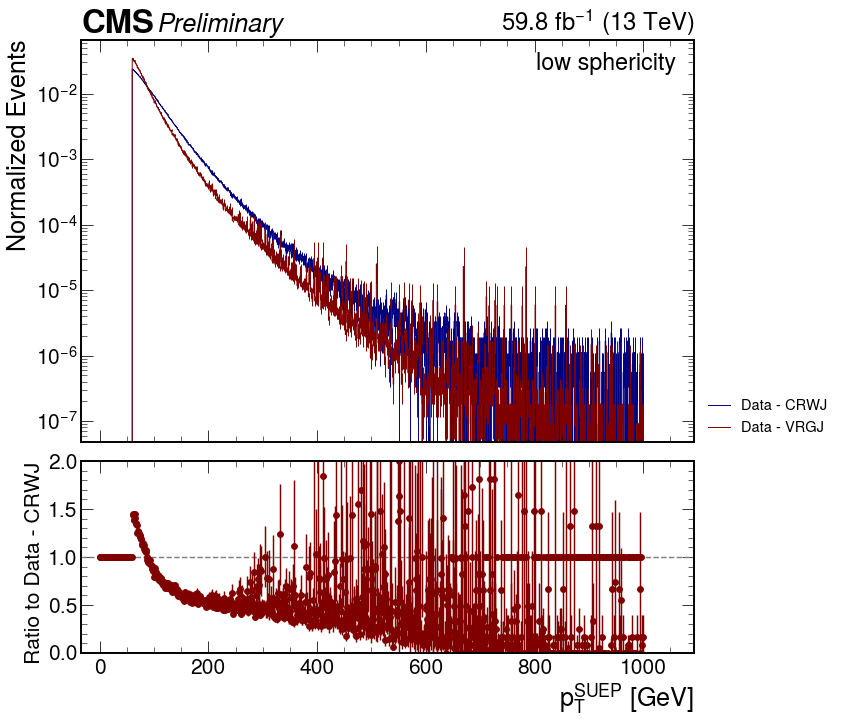

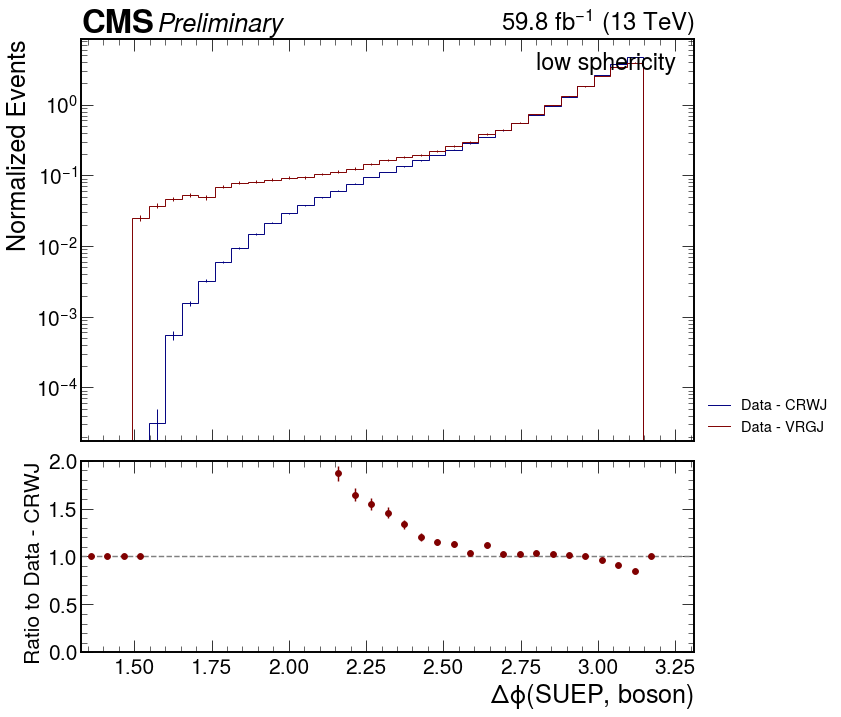

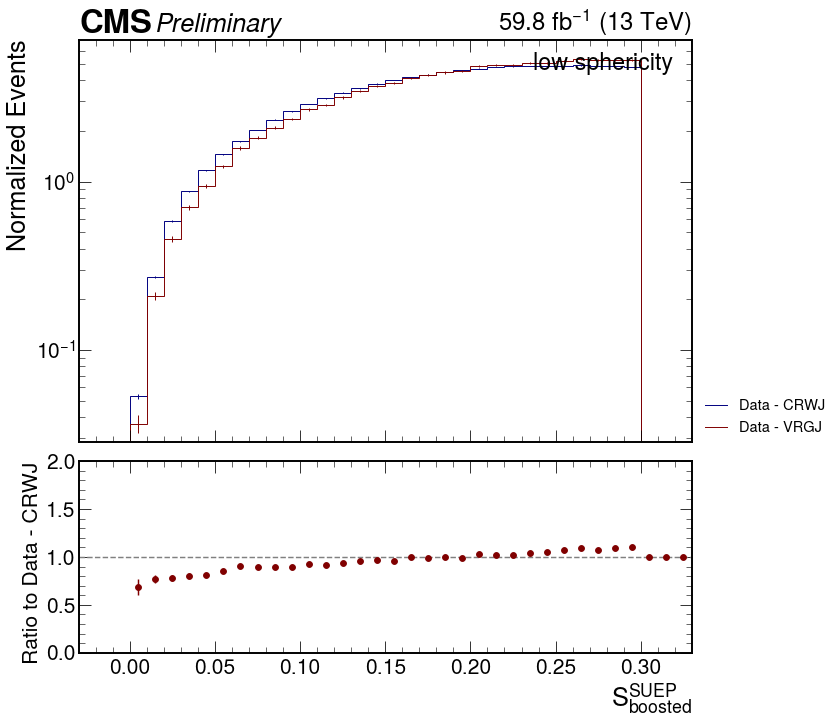

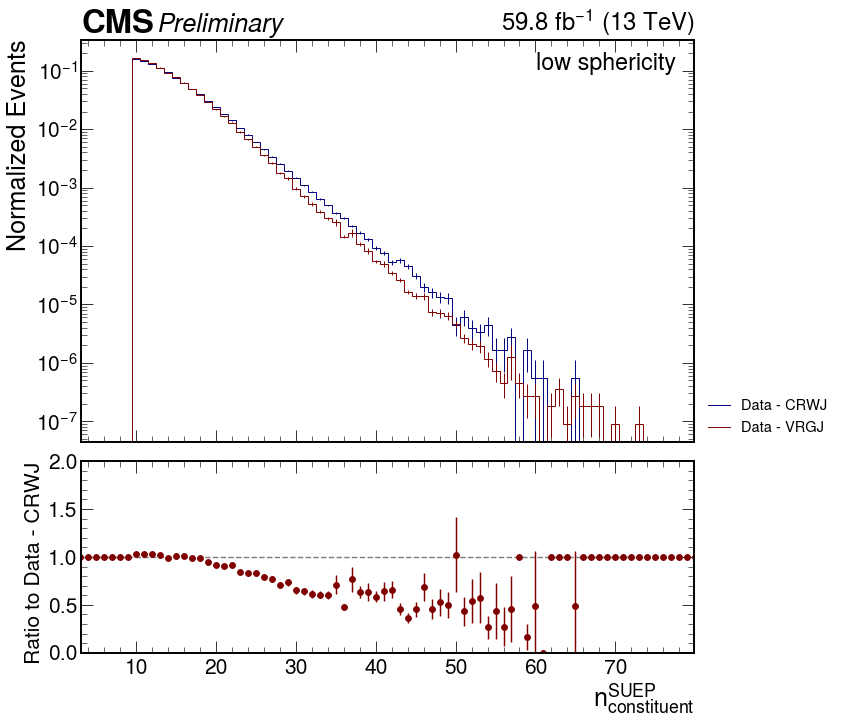

In [21]:
years = ['2018']
plot_labels = [
    ["SUEP_pt_CRWJ", "SUEP_pt_VRGJlowS"],
    ['deltaPhi_SUEP_W_CRWJ', 'deltaPhi_SUEP_photon_VRGJlowS'],
    ['SUEP_S1_CRWJ', 'SUEP_S1_VRGJlowS'],
    ['SUEP_nconst_CRWJ', 'SUEP_nconst_VRGJlowS'],
]
for year in years:
    for pair in plot_labels:

        hwjets = plots['data_'+year][pair[0]].copy()
        hgjets = plots_vrgj['data-VRGJ_'+year][pair[1]].copy()

        if len(hwjets.axes[0]) != len(hgjets.axes[0]):
            ub = min(hwjets.axes[0].edges[-1], hgjets.axes[0].edges[-1]) * 1.0j
            hwjets = hwjets[:ub]
            hgjets = hgjets[:ub]
            lb = max(hwjets.axes[0].edges[0], hgjets.axes[0].edges[0]) * 1.0j
            hwjets = hwjets[lb:]
            hgjets = hgjets[lb:]

            if len(hwjets.axes[0]) < len(hgjets.axes[0]):
                hgjets = rebin_piecewise(hgjets, hwjets.axes[0].edges)
            elif len(hwjets.axes[0]) > len(hgjets.axes[0]):
                hwjets = rebin_piecewise(hwjets, hgjets.axes[0].edges)

        fig, axs = styled_plot_ratio([hwjets, hgjets], labels=["Data - CRWJ", "Data - VRGJ"], density=True)
        hep.cms.label(llabel='Preliminary', lumi=lumiLabel(year), ax=axs[0])
        xlabel = hwjets.axes[0].label.replace("W", "boson")
        axs[1].set_xlabel(xlabel)
        axs[1].set_ylim(0.0, 2.0)
        axs[0].text(0.97, 0.97, "low sphericity",
        transform=axs[0].transAxes, 
        fontsize=24,  va='top', ha='right')

        out_label = pair[0].replace("_W_", "_boson_").replace("_CRWJ", "")
        if save_to_AN: fig.savefig(AN_label.format(f"{out_label}_CRWJVRGJlowS_"+year), bbox_inches='tight')
        
        fig.show()


Years in comparison

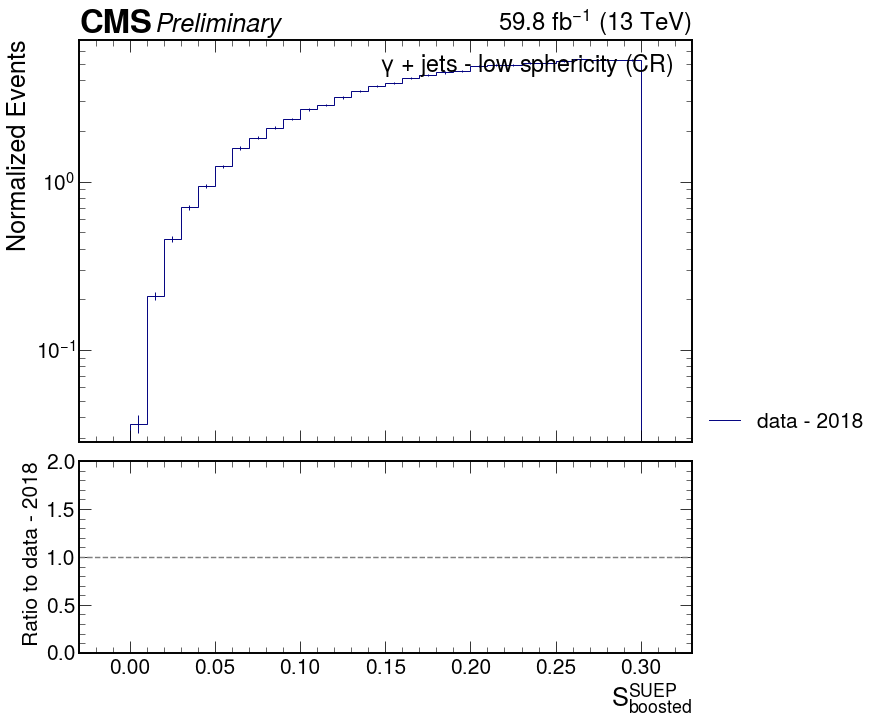

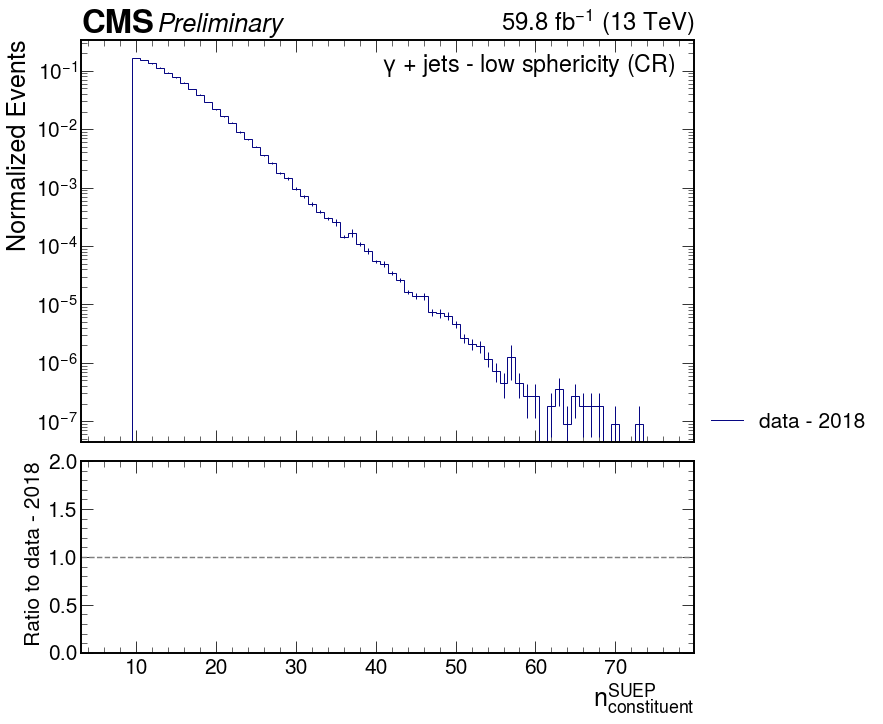

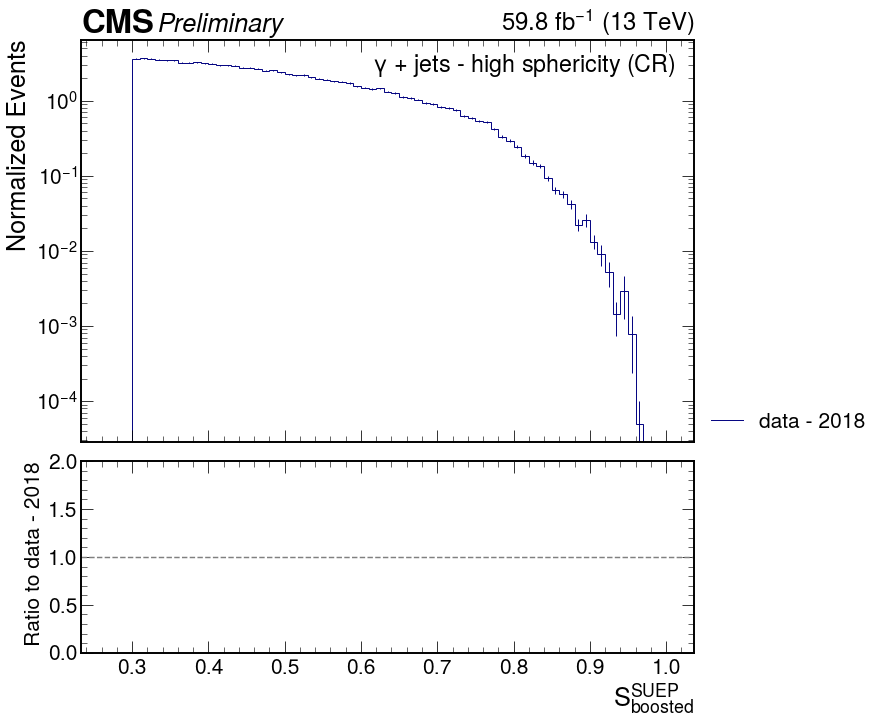

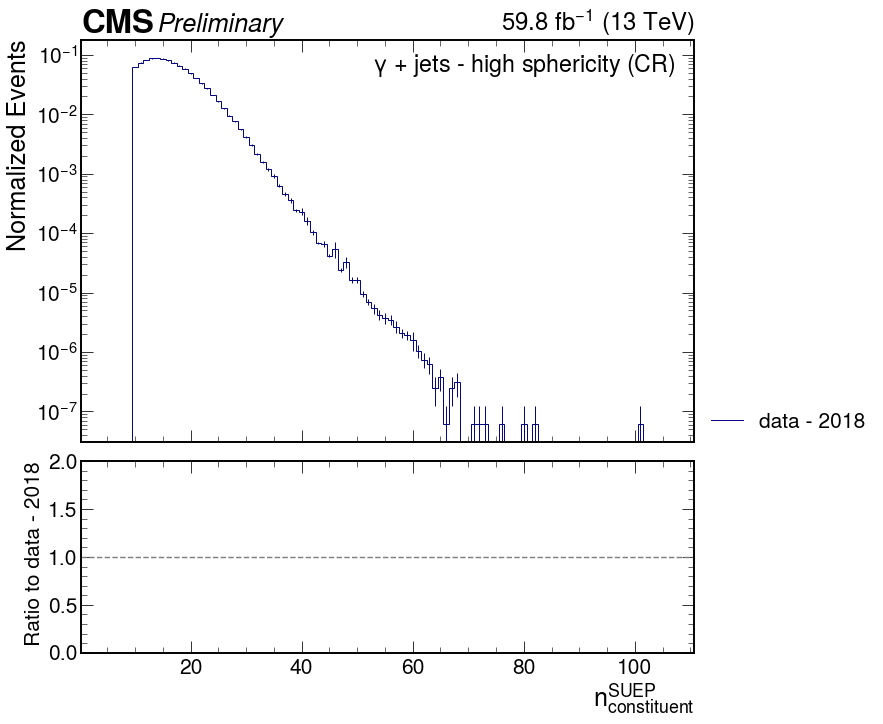

In [22]:
years = ['2018']
plot_labels = [
    'SUEP_S1',
    'SUEP_nconst'
]
plot_tags = ['VRGJlowS', 'VRGJhighS']

for tag in plot_tags:

    for plot_label in plot_labels:

        hlist = [plots_vrgj["data-VRGJ_"+year][plot_label+"_"+tag] for year in years]
        fig, axs = plot_ratio(hlist, ["data - "+year for year in years], density=True)
        hep.cms.label(llabel='Preliminary', lumi=lumiLabel(year), ax=axs[0])
        axs[1].set_ylim(0.0, 2.0)
        axs[0].legend(loc=(1.01,0))
        axs[0].text(0.97, 0.97, region_labels.get(tag, None), 
                    transform=axs[0].transAxes,
                    fontsize=24, va='top', ha='right')

        if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}_{tag}_allyears"), bbox_inches='tight')
        fig.show()

# 7. Background Estimation

In [ ]:
plot_label = "2D_SUEP_S1_vs_SUEP_nconst_SR"
sample = 'MC'
year = '2018'

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()
hep.cms.label(llabel='Simulation',data=False, lumi=lumiLabel(year), ax=ax)
h = plots[sample+"_"+year][plot_label]
_ = hep.hist2dplot(h, 
        norm=matplotlib.colors.LogNorm(),
        cmap = 'PuBu',
        cbar=True,
        label=sample,
        ax=ax)
ax.set_ylim(0, 100)
ax.set_xlim(0.2, 1.0)
lines_y = [10, 20, 30, 100]
lines_x = [0.3, 0.4, 0.5, 1.0]
for y in lines_y:
    ax.axhline(y=y, color='black', linestyle='--')
for x in lines_x:
    ax.axvline(x=x, color='black', linestyle='--')
k = 0
regions = ['A','B','C','D','E','F','G','H','SR']
for i in range(len(lines_x)-1):
    for j in range(len(lines_y)-1):
        xloc = (lines_x[i+1] + lines_x[i])/2 - 0.01
        yloc = (lines_y[j+1] + lines_y[j])/2
        plt.text(xloc, yloc, regions[k])
        k+=1
# if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}"), bbox_inches='tight')
fig.show()

In [ ]:
year = '2018'
sample = 'MC'
slice_var = 'x'
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_SR'
regions_list = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
labels = ["$S^{\mathrm{SUEP}}_{\mathrm{boosted}}$ "+" $\in$ [{},{}]".format(round(regions[0].imag, 2), round(regions[1].imag, 2)) for regions in regions_list]

h = plots[sample+"_"+year][plot_label][:, :100j:2j]
fig, axs = plot_sliced_hist2d(h, regions_list, density=True, stack=False, slice_var=slice_var, labels=labels, ratio=False)
fig.set_size_inches(12, 12)
axs.set_ylim(1e-7)

In [ ]:
year = '2018'
sample = 'MC'
slice_var = 'x'
plot_label = '2D_SUEP_pt_vs_SUEP_nconst_SR'
regions_list = [[60j, 125j], [100j, 220j], [220j, 10000j]]
labels = ["$p^{\mathrm{SUEP}}_{T}$ "+" $\in$ [{},{}]".format(round(regions[0].imag, 2), round(regions[1].imag, 2)) for regions in regions_list]

h = plots[sample+"_"+year][plot_label][:, :100j:2j]
fig, axs = plot_sliced_hist2d(h, regions_list, density=True, stack=False, slice_var=slice_var, labels=labels, ratio=False)
fig.set_size_inches(12, 12)
axs.set_ylim(1e-7)

# 8. Systematics

## 8.2 MC

In [82]:
files_systs = ['/ceph/submit/data/user/l/lavezzo/SUEP/outputs//WH_10_9_signals_2018/SUEP_mS125.000_mPhi3.000_T3.000_modegeneric.pkl']
files_systs.append("/ceph/submit/data/user/l/lavezzo/SUEP/outputs//WH_10_9_signals_2017/SUEP_mS125.000_mPhi3.000_T3.000_modegeneric.pkl")
plots_systs = loader(files_systs, by_bin=False, by_year=True, verbose=True, load_cutflows=False)

Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs//WH_10_9_signals_2018/SUEP_mS125.000_mPhi3.000_T3.000_modegeneric.pkl
	Found era 2018
	Applying xsec 0.4314366
	Applying lumi 59817.406
	Found sample SUEP-WH-mS125_T3.0_mPhi3.0_generic
	Finished loading sample
Loading /ceph/submit/data/user/l/lavezzo/SUEP/outputs//WH_10_9_signals_2017/SUEP_mS125.000_mPhi3.000_T3.000_modegeneric.pkl
	Found era 2017
	Applying xsec 0.4314366
	Applying lumi 41471.589
	Found sample SUEP-WH-mS125_T3.0_mPhi3.0_generic
	Finished loading sample
Finished loading all files


In [83]:
plots_systs.keys()

dict_keys(['SUEP-WH-mS125_T3.0_mPhi3.0_generic', 'SUEP-WH-mS125_T3.0_mPhi3.0_generic_2018', 'SUEP-WH-mS125_T3.0_mPhi3.0_generic_2017'])

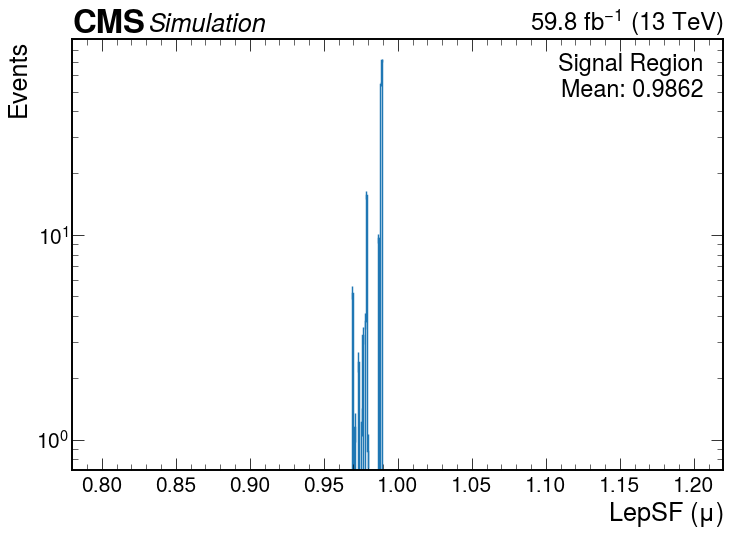

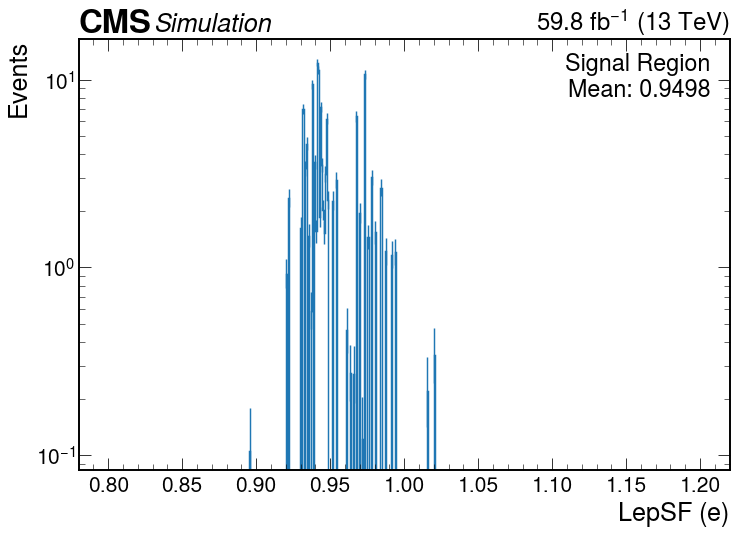

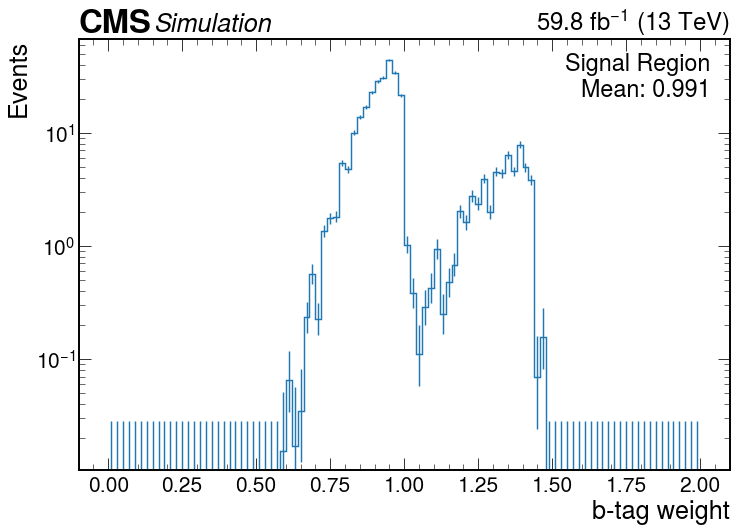

In [42]:
plot_labels = [
    'LepSFMu_SR',
    'LepSFEl_SR',
    'bTagWeight_central_wh_SR'
]
sample = 'SUEP-WH-mS125_T3.0_mPhi3.0_generic'

for plot_label in plot_labels:

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot()
    h = plots_systs[sample][plot_label]
    hep.cms.label(llabel='Simulation', lumi=lumiLabel('2018'), ax=ax)
    hep.histplot(h, ax=ax, label=sample)
    ax.text(0.97, 0.97, region_labels.get("SR")+"\nMean: {}".format(round(hist_mean(h), 4)), 
            transform=ax.transAxes, 
            fontsize=24, va='top', ha='right')
    ax.set_yscale('log')
    ax.set_ylabel("Events")

    if save_to_AN: fig.savefig(AN_label.format(f"{plot_label}"), bbox_inches='tight')
    fig.show()

In [84]:
years = ['2018', '2017']

sample = "SUEP-WH-mS125_T3.0_mPhi3.0_generic"
systs = [
    ['track_down', 'track_up'],
    ['puweights_down', 'puweights_up'],
    ['PSWeight_ISR_down', 'PSWeight_ISR_up'],
    ['PSWeight_FSR_down', 'PSWeight_FSR_up'],
    ['higgs_weights_down', 'higgs_weights_up'],
    ['bTagWeight_HFcorrelated_Dn', 'bTagWeight_HFcorrelated_Up'],
    ['bTagWeight_HFuncorrelated_Dn', 'bTagWeight_HFuncorrelated_Up'],
    ['bTagWeight_LFcorrelated_Dn', 'bTagWeight_LFcorrelated_Up'],
    ['bTagWeight_LFuncorrelated_Dn', 'bTagWeight_LFuncorrelated_Up'],
    ['MuScaleDown', 'MuScaleUp'],
    ['JER_down', 'JER_up'],
    ['JES_down', 'JES_up'],
    ['prefire_down', 'prefire_up'],
    ['LepSFElDown', 'LepSFElUp'],
    ['LepSFMuDown', 'LepSFMuUp'],
    # TODO TRIGGER SFS
]
pretty_label = [
    'Track Killing',
    'Pileup Weights',
    'Parton Shower Weights (ISR)',
    'Parton Shower Weights (FSR)',
    'Higgs $\pt$ Reweighting',
    'b-tagging HF Correlated',
    'b-tagging HF Uncorrelated',
    'b-tagging LF Correlated',
    'b-tagging LF Uncorrelated',
    'Muon Scale',
    'JER',
    'JES',
    'Prefire',
    'Electron Scale Factor',
    'Muon Scale Factor',
]

table = []
for year in years:

    table_year = []
    for syst in systs:

        down_ratio = plots_systs[sample][f"SUEP_nconst_SR_{syst[0]}"].sum().value * 100 / plots_systs[sample]["SUEP_nconst_SR"].sum().value
        up_ratio = plots_systs[sample][f"SUEP_nconst_SR_{syst[1]}"].sum().value * 100/ plots_systs[sample]["SUEP_nconst_SR"].sum().value

        max_variation = max(abs(100 - down_ratio), abs(100 - up_ratio))
        table_year.append(max_variation)

        # only plot for 2018
        if year == '2018' and False:
            fig, axs = plot_ratio(
                [plots_systs[sample]["SUEP_nconst_SR"][::4j], plots_systs[sample][f"SUEP_nconst_SR_{syst[0]}"][::4j], plots_systs[sample][f"SUEP_nconst_SR_{syst[1]}"][::4j]],
                ["nominal", syst[0] + " ({:.5f}%)".format(down_ratio), syst[1] + " ({:.5f}%)".format(up_ratio)]
            )
            hep.cms.label(llabel='Simulation', lumi=lumiLabel(year), ax=axs[0])
            axs[0].set_ylim()
            axs[1].set_ylim(0.9, 1.1)
            axs[0].legend(fontsize='small', loc=(1.01,0))
            axs[0].text(0.97, 0.97, region_labels.get("SR"), 
                        transform=axs[0].transAxes,
                        fontsize=24, va='top', ha='right')
            if save_to_AN: fig.savefig(AN_label.format(f"SUEP_nconst_SR_{syst[0]}_{syst[1]}"), bbox_inches='tight')
            fig.show()
        
    table.append(table_year)

KeyError: 'SUEP_nconst_SR_track_down'

Conver this to Latex

In [64]:
from prettytable import PrettyTable

table_obj = PrettyTable()

table_obj.add_column("Systematic", pretty_label)
for year in years:
    table_obj.add_column(f"Effect in {year} (\%)", [round(val, 2) for val in table[0]])

print(table_obj)
# to latex!
print(table_obj.get_latex_string())

+-----------------------------+--------------------+
|          Systematic         | Effect in 2018 (%) |
+-----------------------------+--------------------+
|        Track Killing        |        0.15        |
|          PU Weights         |        0.33        |
| Parton Shower Weights (ISR) |        1.6         |
| Parton Shower Weights (FSR) |        0.04        |
|   Higgs $\pt$ Reweighting   |       11.99        |
|   b-tagging HF Correlated   |        0.03        |
|  b-tagging HF Uncorrelated  |        0.02        |
|   b-tagging LF Correlated   |        0.73        |
|  b-tagging LF Uncorrelated  |        0.5         |
|          Muon Scale         |        0.02        |
|             JER             |        1.03        |
|             JES             |        0.66        |
|           Prefire           |        0.0         |
|         Electron SF         |        0.66        |
|           Muon SF           |        0.08        |
+-----------------------------+---------------

B-tagging weights

In [71]:
files_btag_18 = getHistList("/ceph/submit/data/user/l/lavezzo/SUEP/outputs/", "WH_10_9_btag_2018", "../filelist/WH/list_2018_MC_WH.txt", file_ext=".pkl")
plots_btag_18 = loader(files_btag_18, by_bin=False, by_year=True, verbose=False, load_cutflows=False)
plots_btag_18 = combineSamples(plots_btag_18, samples=[s+"_2018" for s in bkgs], new_tag='MC_2018')

Finished loading all files


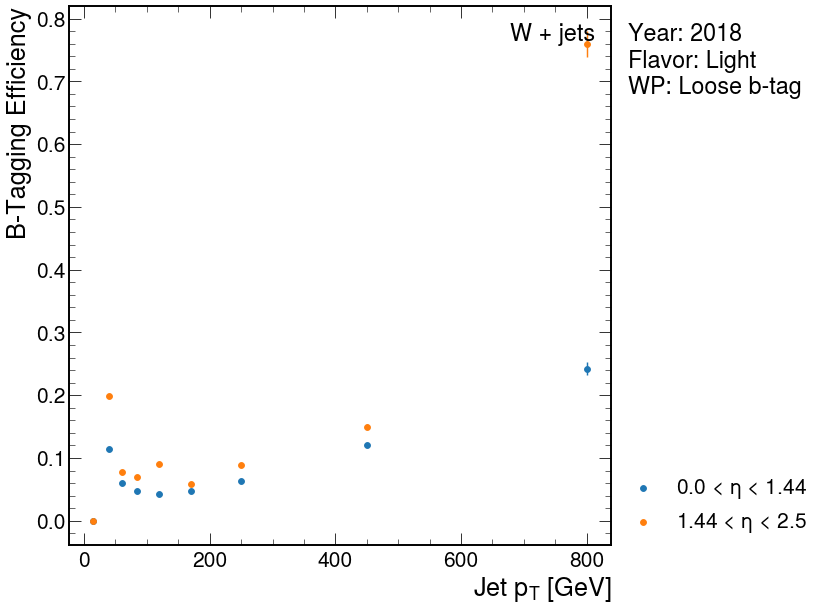

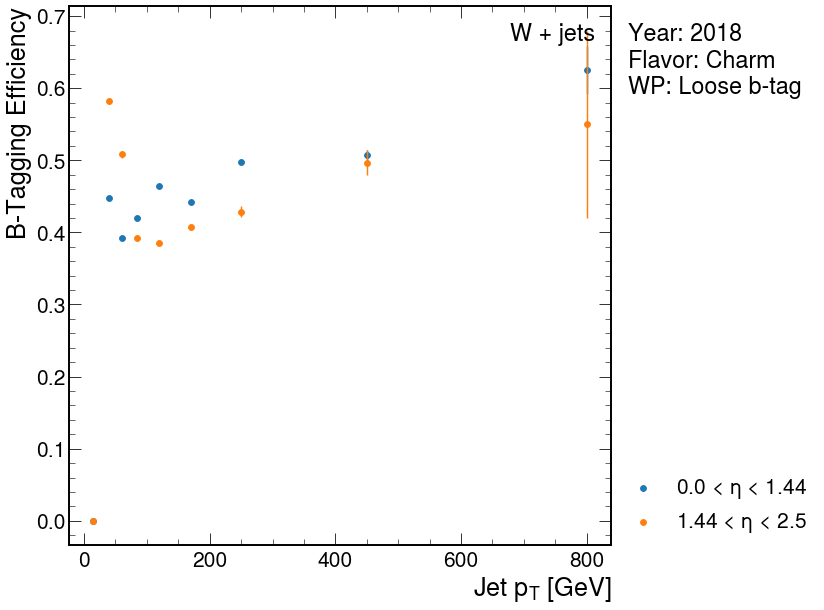

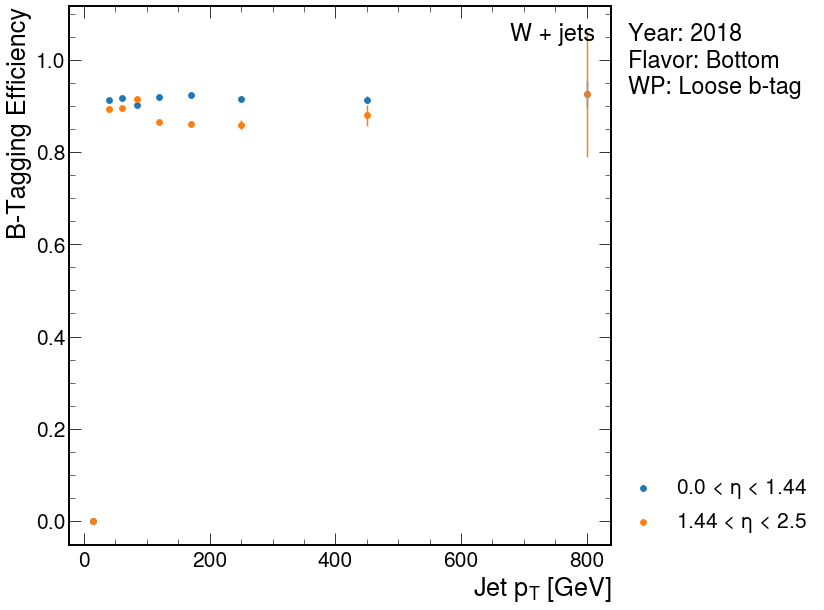

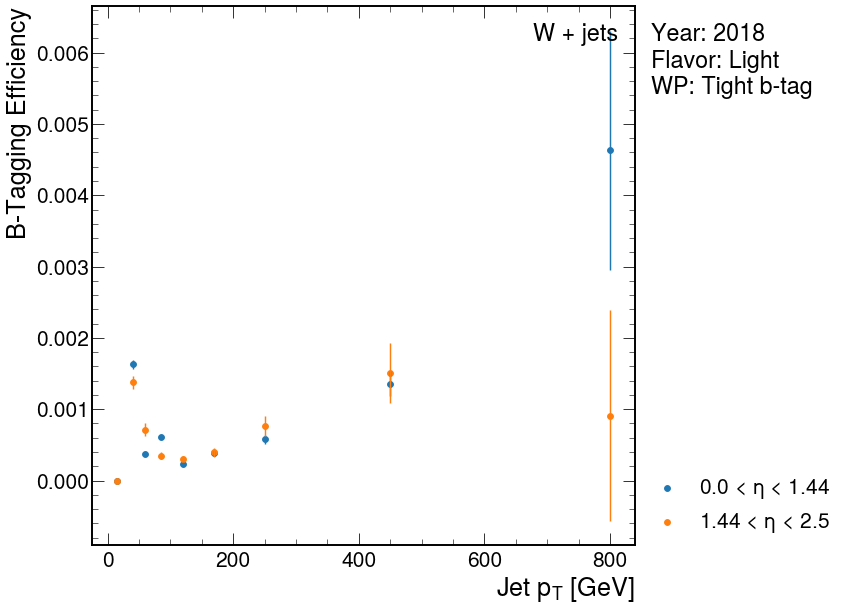

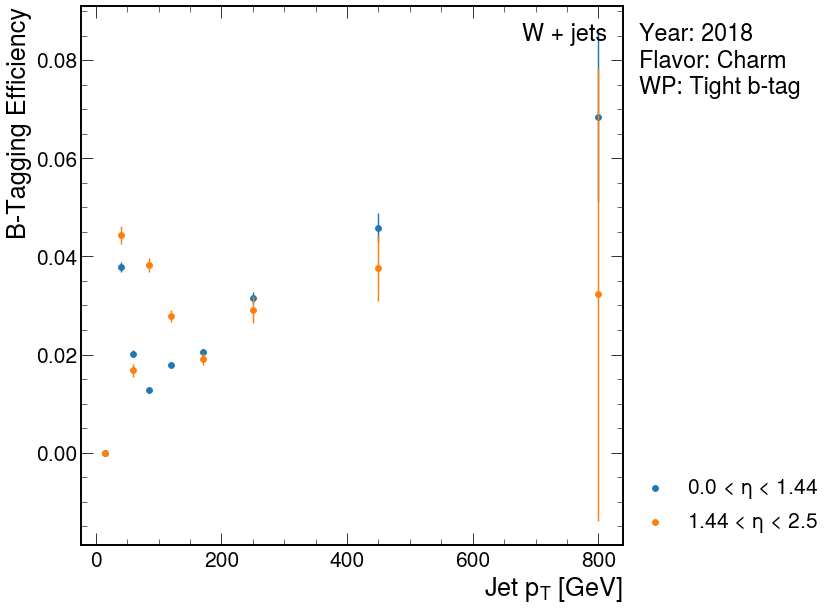

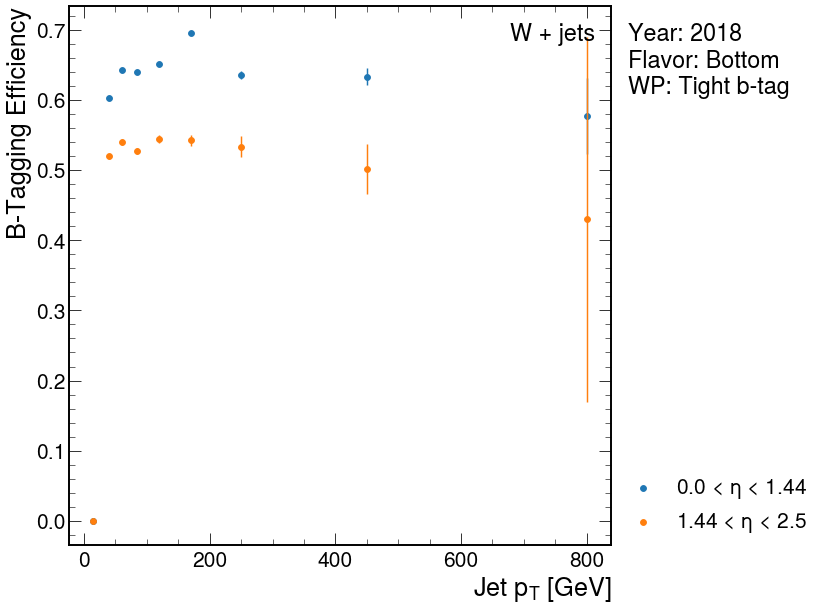

In [79]:
from hist import Hist
from coffea.lookup_tools.dense_lookup import dense_lookup

# toggle whether you want to update the pickle files
save_to_file = False

years = ['2018']
for year in years:

    plot_label = '4D_jets_pt_vs_jets_eta_vs_jets_hadronFlavor_vs_jets_btag_category_WJnoB'
    sample = 'MC_' + year

    hadronFlavors_labels = ['Light', 'Charm', 'Bottom']
    hadronFlavors_shortLabels = ['L', 'C', 'B'] # used to save the hists
    btag_categories_labels = ['No b-tag', 'Loose b-tag', 'Tight b-tag']
    btag_categories_shortLabels = [None, 'L', 'T'] # used to save the hists

    effsFile = {}

    for btag_category in range(len(plots_btag_18[sample][plot_label].axes[-1])):

        if btag_category == 0: continue
        effsFile[btag_categories_shortLabels[btag_category]] = {}

        for hadronFlavor in range(len(plots_btag_18[sample][plot_label].axes[-2])):

            effs = []
            effs_errs = []
            labels = []

            pt_centers = plots_btag_18[sample][plot_label].axes[0].centers
            pt_bins = plots_btag_18[sample][plot_label].axes[0].edges
            eta_bins = plots_btag_18[sample][plot_label].axes[-3].edges
            for eta_bin in range(len(plots_btag_18[sample][plot_label].axes[-3])):

                # eff = tagged as b-jet for this WP / total
                _pass = plots_btag_18[sample][plot_label][:, eta_bin, hadronFlavor, btag_category::sum].values()
                _tot = plots_btag_18[sample][plot_label][:, eta_bin, hadronFlavor, ::sum].values()

                _eff = np.where(_tot > 0, _pass / _tot, 0)
                _eff_err = np.sqrt(_eff * (1 - _eff) / _tot)
                _label = f"{eta_bins[eta_bin]} < $\eta$ < {eta_bins[eta_bin+1]}"
                effs.append(_eff)
                effs_errs.append(_eff_err)
                labels.append(_label)

            fig = plt.figure()
            ax = fig.add_subplot()
            for e, l, err in zip(effs, labels, effs_errs):
                ax.scatter(pt_centers, e, label=l)
                ax.errorbar(pt_centers, e, linestyle='', yerr=err)

            plot_text = "W + jets"
            plot_text2 = "Year: {}\nFlavor: {}\nWP: {}".format(year, hadronFlavors_labels[hadronFlavor], btag_categories_labels[btag_category])
            ax.text(0.97, 0.97, plot_text,
                    transform=ax.transAxes, 
                    fontsize=24, va='top', ha='right')
            ax.text(1.03, 0.97, plot_text2,
                    transform=ax.transAxes, 
                    fontsize=24, va='top', ha='left')
            ax.legend(loc=(1.01, 0.0))
            ax.set_xlabel("Jet $p_T$ [GeV]")
            ax.set_ylabel("B-Tagging Efficiency")

            if save_to_file:
                h = Hist.new.Var(pt_bins).Var(eta_bins).Weight()
                h[:,:] = np.stack([np.array(effs).T, np.array(effs_errs).T], axis=-1)
                corr = dense_lookup(h.values(), [ax.edges for ax in h.axes[:]])
                effsFile[btag_categories_shortLabels[btag_category]][hadronFlavors_shortLabels[hadronFlavor]] = corr

            if save_to_AN: fig.savefig(AN_label.format(f"btag_eff_{year}_{btag_categories_shortLabels[btag_category]}_{hadronFlavors_shortLabels[hadronFlavor]}"), bbox_inches='tight')
            fig.show()

    if save_to_file:

        year_tag = year[2:].upper()
        with open(f'../data/BTagUL{year_tag}/wh_crwj_eff.pickle', 'wb') as f:
            pickle.dump(effsFile, f)
        with open(f'../data/BTagUL{year_tag}/wh_crtt_eff.pickle', 'wb') as f:
            pickle.dump(effsFile, f)
        with open(f'../data/BTagUL{year_tag}/wh_sr_eff.pickle', 'wb') as f:
            pickle.dump(effsFile, f)